<a href="https://colab.research.google.com/github/AhmedNousir/Arabic-Sign-Language-Recognation/blob/main/Arabic_Sign_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arabic Sign Language Classification



Sign language consists of hand expressions and sometimes facial expressions of a person, and most ordinary people may not understand sign language clearly so there is a huge communication gap between deaf communities and the general public. Therefore there is an inevitability of technological support for people with a speech impairment as it is impossible to have someone present to translate what a deaf person is saying at all times. Through advances in science and technology, we can consider designing an approach that can interpret gesture signals into human text or automated text that can be decoded. This facilitates conversations between the deaf person and the speaking person, and indeed there are works in sign language, but they are all signs in non-Arabic languages, and therefore this work has been done on Arabic Sign language.

## About the dataset :
dataset consists of 54,049 images of ArSL alphabets performed by more than 40 people for 32 standard Arabic signs and alphabets. The number of images per class differs from one class to another. Sample image of all Arabic Language Signs is also attached. The CSV file contains the Label of each corresponding Arabic Sign Language Image based on the image file name.

Data link : https://data.mendeley.com/datasets/y7pckrw6z2/1

## Import Library
Import libraries necessary for this project:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import glob as gb
import random
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
import keras 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras import models
from keras.models import Model
from keras.layers import add
from keras.models import load_model
from keras.layers import Input
import pydot
from keras.utils.vis_utils import plot_model
from IPython.display import Image as IPythonImage



# Loading Data 
Load the dataset files ( Every image in every category and csv file )

For google lab

In [ ]:
#for colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#for colab
!unzip '/content/drive/MyDrive/Colab Notebooks/ArASL_Database.zip'


Streaming output truncated to the last 5000 lines.
  inflating: ArASL_Database_54K_Final/waw/WAW (449).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (45).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (450).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (451).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (452).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (453).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (454).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (455).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (456).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (457).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (458).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (459).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (46).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (460).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (461).JPG  
  inflating: ArASL_Database_54K_Final/waw/WAW (462).JPG  
  inflating: ArASL_Data

In [ ]:
DataPath ='ArASL_Database_54K_Final//'

CATEGORIES = ['ain',
 'al',
 'aleff',
 'bb',
 'dal',
 'dha',
 'dhad',
 'fa',
 'gaaf',
 'ghain',
 'ha',
 'haa',
 'jeem',
 'kaaf',
 'khaa',
 'la',
 'laam',
 'meem',
 'nun',
 'ra',
 'saad',
 'seen',
 'sheen',
 'ta',
 'taa',
 'thaa',
 'thal',
 'toot',
 'waw',
 'ya',
 'yaa',
 'zay']
for category in CATEGORIES:  
  path = os.path.join(DataPath,category)  # create path 
print(CATEGORIES)
print(len(CATEGORIES))

['ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf', 'ghain', 'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 'laam', 'meem', 'nun', 'ra', 'saad', 'seen', 'sheen', 'ta', 'taa', 'thaa', 'thal', 'toot', 'waw', 'ya', 'yaa', 'zay']
32


In [ ]:
#for jupyter
#datacv = pd.read_csv('ImagesClassPath.csv')
#for colab
datacv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ImagesClassPath.csv')

# Data Exploration
Now we need to know all the details about the data                                                                             
1)Read data details from CSV file                                                                                               
2)show images from each category

In [ ]:
datacv.head()

id  ClassId                              ImagePath
0   1        0     ArASL_Database_54K/ain/AIN (1).JPG
1   2        0    ArASL_Database_54K/ain/AIN (10).JPG
2   3        0   ArASL_Database_54K/ain/AIN (100).jpg
3   4        0  ArASL_Database_54K/ain/AIN (1000).JPG
4   5        0  ArASL_Database_54K/ain/AIN (1001).JPG

In [ ]:
print(datacv.shape)
datacv.info()
datacv.isnull().any()
datacv.describe()

(54049, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54049 entries, 0 to 54048
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         54049 non-null  int64 
 1   ClassId    54049 non-null  int64 
 2   ImagePath  54049 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


id       ClassId
count  54049.000000  54049.000000
mean   27025.000000     15.202686
std    15602.746687      9.108458
min        1.000000      0.000000
25%    13513.000000      7.000000
50%    27025.000000     15.000000
75%    40537.000000     23.000000
max    54049.000000     31.000000

We will convert (Classid) from numbers to Arabic alphabet to make it easier to read

In [ ]:
arabic_letters = ['ع', 'ال', 'أ', 'ب', 'د', 'ظ', 'ض', 'ف', 'ق', 'غ', 'ه', 'ح', 'ج', 'ك', 'خ', 'لا', 'ل', 'م', 'ن', 'ر', 'ص', 'س', 'ش', 'ط', 'ت', 'ث', 'ذ', 'ة', 'و', 'ئ', 'ي', 'ز']

In [ ]:
for i in range(datacv.shape[0]):
    datacv.loc[i, 'ClassId'] = arabic_letters[datacv.loc[i, 'ClassId']]

In [ ]:
datacv.head(-5)

id ClassId                              ImagePath
0          1       ع     ArASL_Database_54K/ain/AIN (1).JPG
1          2       ع    ArASL_Database_54K/ain/AIN (10).JPG
2          3       ع   ArASL_Database_54K/ain/AIN (100).jpg
3          4       ع  ArASL_Database_54K/ain/AIN (1000).JPG
4          5       ع  ArASL_Database_54K/ain/AIN (1001).JPG
...      ...     ...                                    ...
54039  54040       ز   ArASL_Database_54K/zay/ZAY (990).jpg
54040  54041       ز   ArASL_Database_54K/zay/ZAY (991).jpg
54041  54042       ز   ArASL_Database_54K/zay/ZAY (992).jpg
54042  54043       ز   ArASL_Database_54K/zay/ZAY (993).jpg
54043  54044       ز   ArASL_Database_54K/zay/ZAY (994).jpg

[54044 rows x 3 columns]

Text(0.5, 1.0, 'Frequency of each letters')

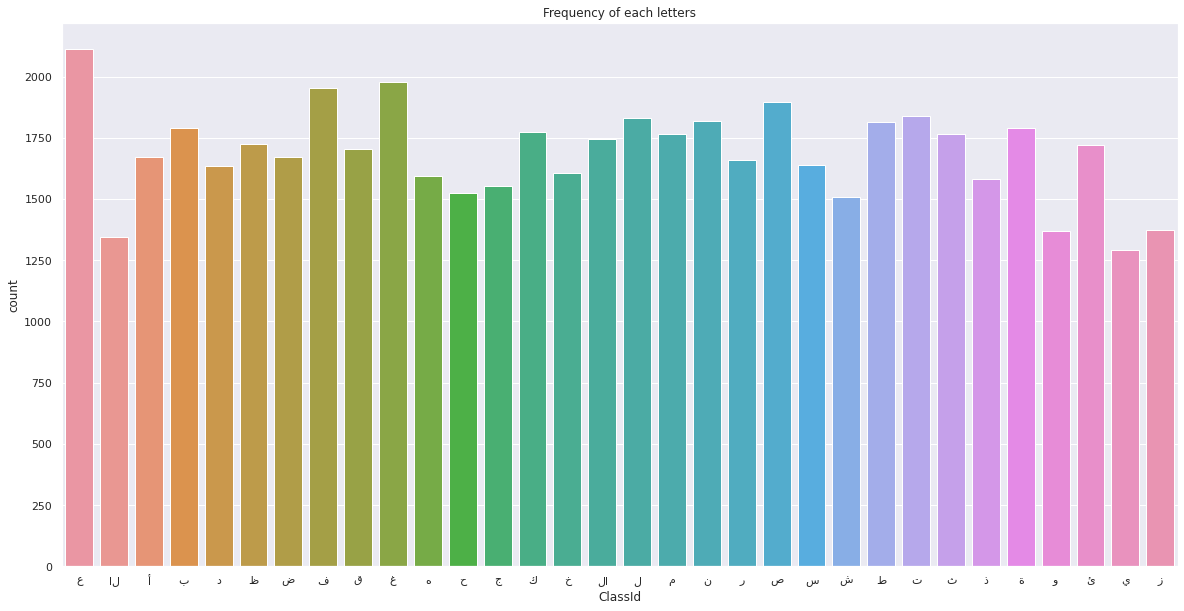

In [ ]:
sns.set()
warnings.filterwarnings("ignore")
data_label=datacv['ClassId']
plt.figure(figsize=(20,10))
sns.countplot(data_label)
plt.title("Frequency of each letters")

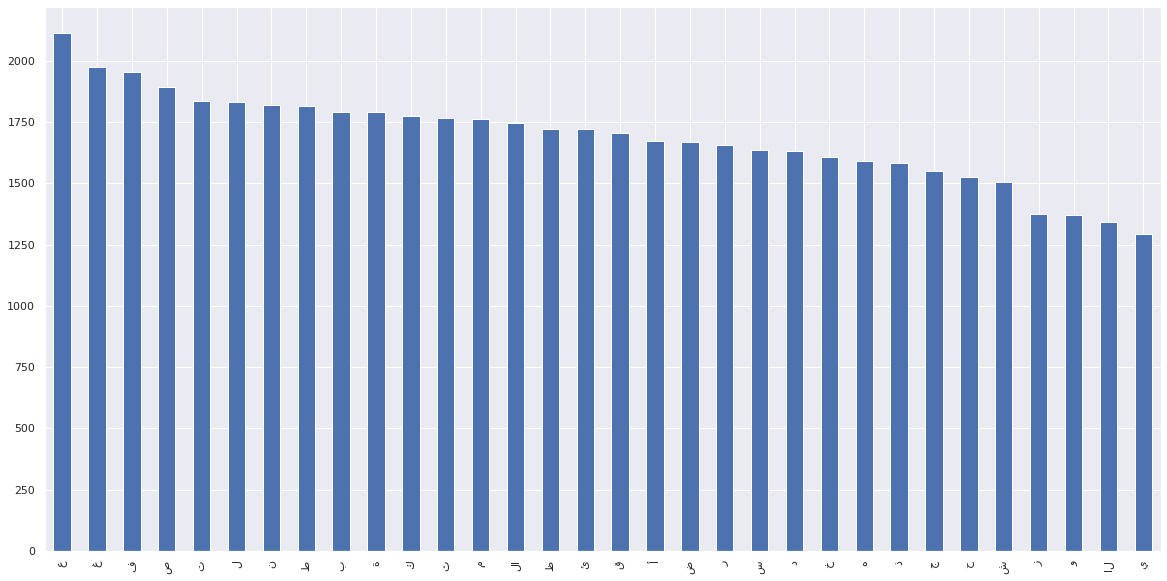

In [ ]:
plt.figure(figsize=(20,10))
datacv['ClassId'].value_counts().plot.bar()

#### Visualizing some examples from each category

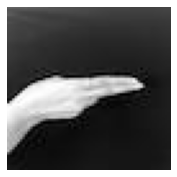

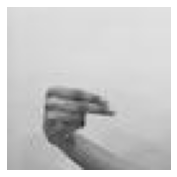

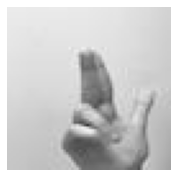

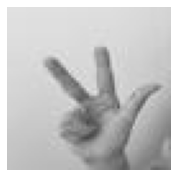

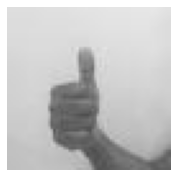

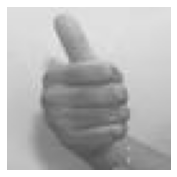

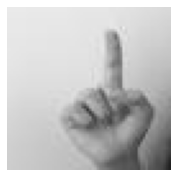

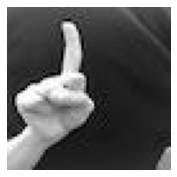

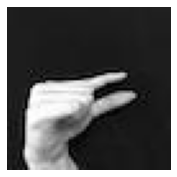

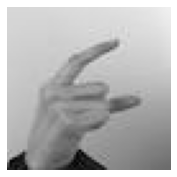

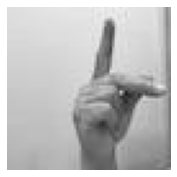

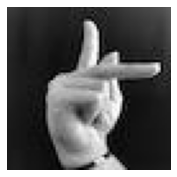

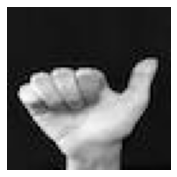

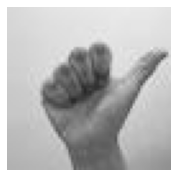

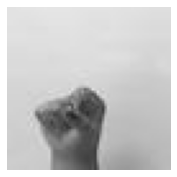

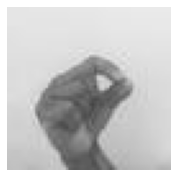

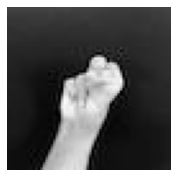

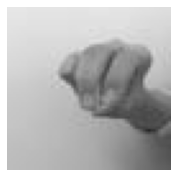

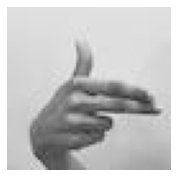

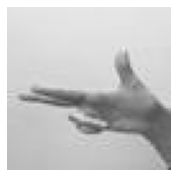

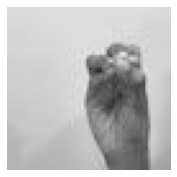

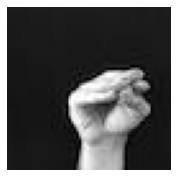

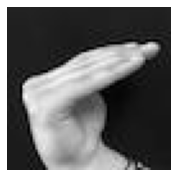

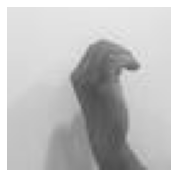

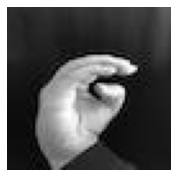

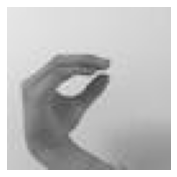

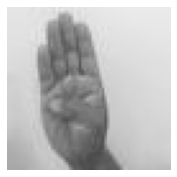

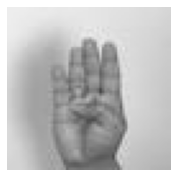

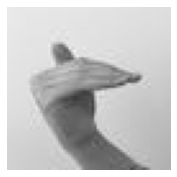

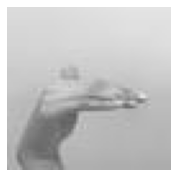

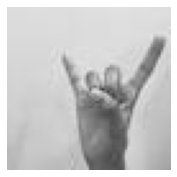

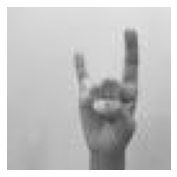

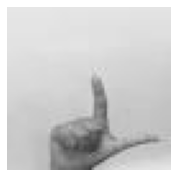

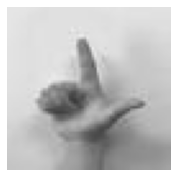

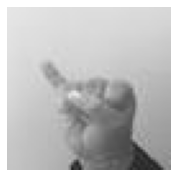

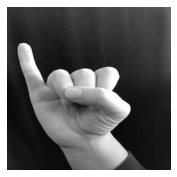

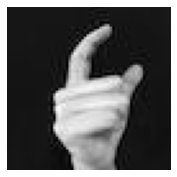

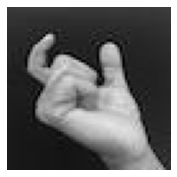

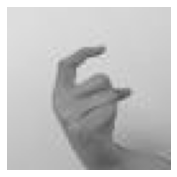

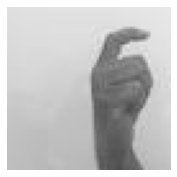

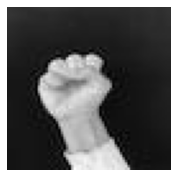

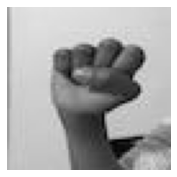

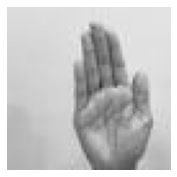

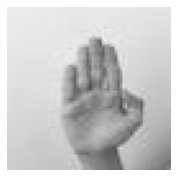

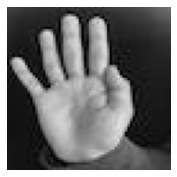

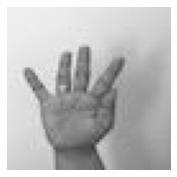

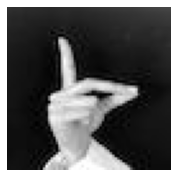

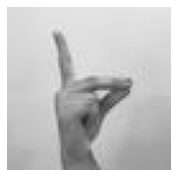

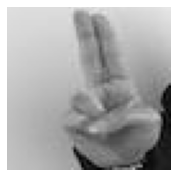

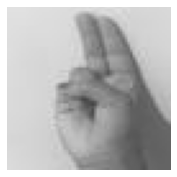

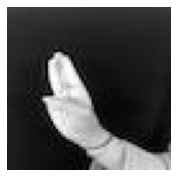

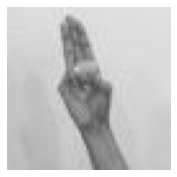

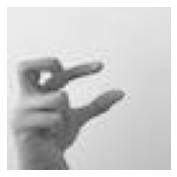

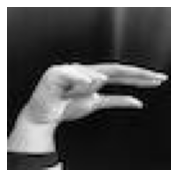

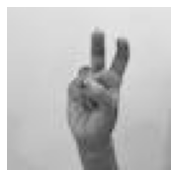

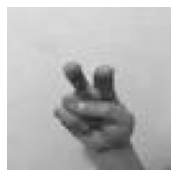

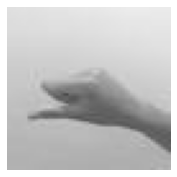

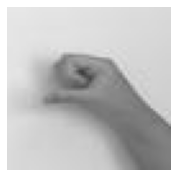

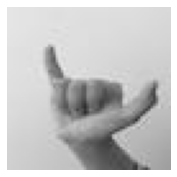

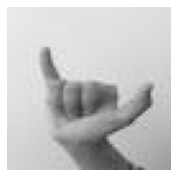

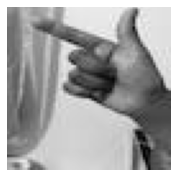

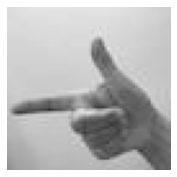

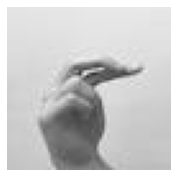

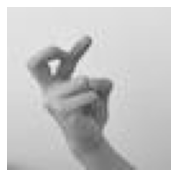

In [ ]:
for category in CATEGORIES:  
    path = os.path.join(DataPath,category)  # create path 
    x=0
    for img in os.listdir(path):  # iterate over each image 
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.figure(figsize=(3,3))
        plt.axis('off')
        plt.imshow(cv2.imread(os.path.join(path,img))) 
        plt.show()  # display
        if x==2 : 
            break       

####  we count the images in each folder to see how many images per letter

In [ ]:
for folder in  os.listdir(DataPath) : 
    files = gb.glob(pathname= str( 'ArASL_Database_54K_Final//'  + folder + '/*.jpg'))
    print(f'found {len(files)} in folder {folder}')

found 1605 in folder ghain
found 1734 in folder ain
found 1250 in folder ha
found 1311 in folder dhad
found 1220 in folder thal
found 1395 in folder meem
found 1357 in folder gaaf
found 1509 in folder saad
found 1202 in folder yaa
found 1441 in folder taa
found 1326 in folder ya
found 1151 in folder haa
found 1243 in folder dal
found 1449 in folder nun
found 1346 in folder bb
found 1026 in folder waw
found 1003 in folder zay
found 1276 in folder ra
found 1377 in folder dha
found 1460 in folder ta
found 1422 in folder la
found 1406 in folder kaaf
found 1464 in folder laam
found 1270 in folder aleff
found 1209 in folder al
found 1456 in folder toot
found 1590 in folder fa
found 1233 in folder khaa
found 1143 in folder sheen
found 1164 in folder jeem
found 1280 in folder seen
found 1369 in folder thaa


In [ ]:
print(img_array)
print(img_array.shape)


[[227 227 227 ... 220 220 220]
 [227 227 227 ... 220 220 220]
 [227 227 227 ... 220 220 220]
 ...
 [172 173 175 ... 179 178 178]
 [157 159 162 ... 178 178 177]
 [147 149 152 ... 178 177 177]]
(64, 64)


#### Now we count the images in each format

In [ ]:
size = []
for folder in  os.listdir(DataPath) : 
    files = gb.glob(pathname= str( 'ArASL_Database_54K_Final//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(64, 64)       42436
(256, 256)       239
(1024, 768)       10
(64, 64, 3)        2
dtype: int64

# Data Preprocessing


### normalize data size to 64*64
We normalize all image sizes to (64,64) because most images have size (64,64)

In [ ]:
training_data = []
IMG_SIZE=64
def create_Listdata():
    for category in CATEGORIES:  # do 

        path = os.path.join(DataPath,category)  # create path to 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1).

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_Listdata()

print(len(training_data))

100%|██████████| 1373/1373 [00:00<00:00, 9269.38it/s] 

54017


In [ ]:
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

9
12
3
18
0
1
21
9
28
23


In [ ]:
training_data[:10]


[[array([[ 58,  55,  52, ...,  95, 100, 102],
         [ 57,  54,  52, ...,  95,  99, 101],
         [ 55,  53,  51, ...,  94,  99, 101],
         ...,
         [137, 136, 135, ...,  22,  24,  26],
         [130, 132, 132, ...,  23,  25,  27],
         [129, 131, 128, ...,  24,  26,  28]], dtype=uint8), 9],
 [array([[67, 67, 67, ..., 72, 73, 74],
         [65, 65, 65, ..., 70, 71, 72],
         [63, 63, 63, ..., 68, 68, 69],
         ...,
         [42, 38, 36, ..., 43, 43, 44],
         [43, 38, 36, ..., 44, 45, 45],
         [43, 38, 37, ..., 45, 46, 46]], dtype=uint8), 12],
 [array([[46, 46, 46, ..., 50, 51, 51],
         [44, 44, 44, ..., 49, 50, 50],
         [42, 42, 42, ..., 47, 48, 48],
         ...,
         [19, 19, 19, ..., 27, 25, 19],
         [19, 19, 19, ..., 31, 40, 22],
         [19, 19, 19, ..., 33, 13, 38]], dtype=uint8), 3],
 [array([[36, 36, 36, ..., 34, 34, 34],
         [36, 36, 35, ..., 34, 34, 34],
         [35, 35, 35, ..., 33, 33, 33],
         ...,
         [

### Split data to ( x and y ) and Reshaping Input Images to 64x64x1

In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)
y = np.array(y)

[[[[ 58]
   [ 55]
   [ 52]
   ...
   [ 95]
   [100]
   [102]]

  [[ 57]
   [ 54]
   [ 52]
   ...
   [ 95]
   [ 99]
   [101]]

  [[ 55]
   [ 53]
   [ 51]
   ...
   [ 94]
   [ 99]
   [101]]

  ...

  [[137]
   [136]
   [135]
   ...
   [ 22]
   [ 24]
   [ 26]]

  [[130]
   [132]
   [132]
   ...
   [ 23]
   [ 25]
   [ 27]]

  [[129]
   [131]
   [128]
   ...
   [ 24]
   [ 26]
   [ 28]]]]


In [ ]:
print(len(X))
print(len(y))
print(f'X shape  is {X.shape}')
print(f'Y shape  is {y.shape}')

54017
54017
X shape  is (54017, 64, 64)
Y shape  is (54017,)


### make function to change from numbers to Arabic alphabet to make it easier to read

In [ ]:
symbol = {'ع':0 ,
        'ال':1,
        'أ':2,
        'ب':3,
        'د':4,
        'ظ':5,
        'ض':6,
        'ف':7,
        'ق':8,
        'غ':9,
        'ه':10,
        'ح':11,
        'ج':12,
        'ك':13,
        'خ':14,
        'لا':15,
        'ل':16,
        'م':17,
        'ن':18,
        'ر':19,
        'ص':20,
        'س':21,
        'ش':22,
        'ط':23,
        'ت':24,
        'ث':25,
        'ذ':26,
        'ة':27,
        'و':28,
        'ئ':29,
        'ي':30,
        'ز':31,}
print(symbol)
def getsymbol(s) : 
    for i , j in symbol.items() : 
        if s == j : 
            return i    

{'ع': 0, 'ال': 1, 'أ': 2, 'ب': 3, 'د': 4, 'ظ': 5, 'ض': 6, 'ف': 7, 'ق': 8, 'غ': 9, 'ه': 10, 'ح': 11, 'ج': 12, 'ك': 13, 'خ': 14, 'لا': 15, 'ل': 16, 'م': 17, 'ن': 18, 'ر': 19, 'ص': 20, 'س': 21, 'ش': 22, 'ط': 23, 'ت': 24, 'ث': 25, 'ذ': 26, 'ة': 27, 'و': 28, 'ئ': 29, 'ي': 30, 'ز': 31}


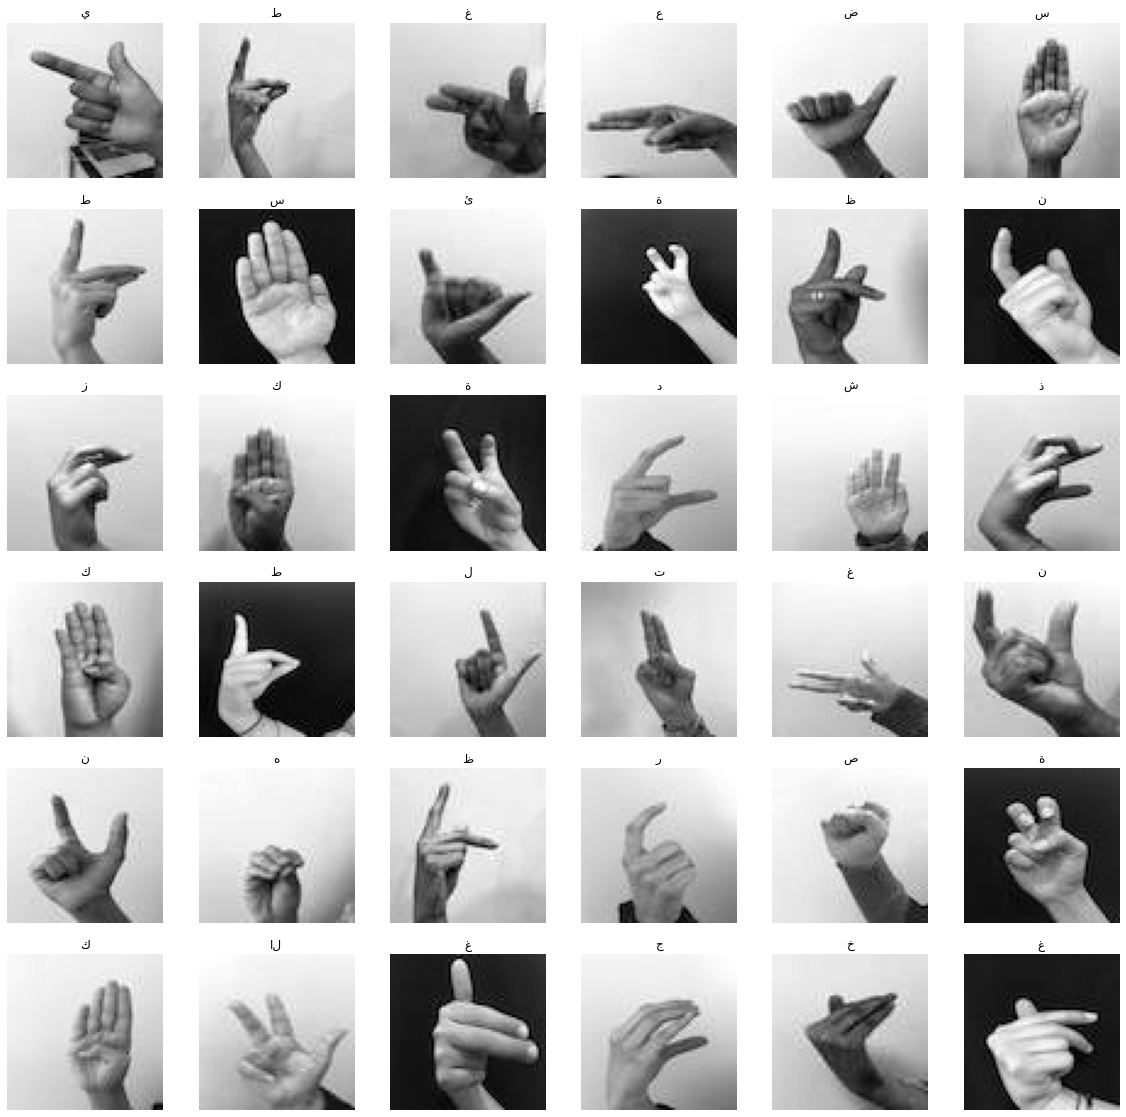

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X[i],cmap='gray')   
    plt.axis('off')
    plt.title(getsymbol(y[i]))

### split data to train and test 
### and split trian to training and validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=44) 

print('X_train shape is ' , X_train.shape)
print('X_val shape is ' , X_val.shape)
print('X_test shape is ' , X_test.shape)

print('y_train shape is ' , y_train.shape)
print('y_val shape is ' , y_val.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (32409, 64, 64)
X_val shape is  (10804, 64, 64)
X_test shape is  (10804, 64, 64)
y_train shape is  (32409,)
y_val shape is  (10804,)
y_test shape is  (10804,)


# **Neural Network**

### It is a field that investigates how simple models of biological brains can be used to solve difficult computational tasks like the predictive modeling tasks we see in machine learning
### The goal is not to create realistic models of the brain, but instead to develop robust algorithms and data structures that we can use to model difficult problems.

### **Input Layer:** takes raw input from the domain. No computation is performed at this layer. 

### **Hidden Layer:** performs all kinds of computation on the features entered through the input layer and transfers the result to the output layer.

### **Output Layer:** It’s the final layer of the network that brings the information learned through the hidden layer and delivers the final value as a result

### **ForwardPropagation:** the flow of information occurs in the forward direction. The input is used to calculate some intermediate function in the hidden layer, which is then used to calculate an output. 

### **Backpropagation:** the weights of the network connections are repeatedly adjusted to minimize the difference between the actual output vector of the net and the desired output vector.( Keras does backpropagation automatically. There's absolutely nothing you need to do for that except for training the model with one of the fit methods )




## **Activation function:** is a simple mapping of summed weighted input to the output of the neuron.
### the purpose of an activation function is to add non-linearity to the neural network.


### **Types of Neural Networks Activation Functions:**

### **Linear Activation Function:**

### **1. Linear Activation Function:** is also known as Identity Function where the activation is proportional to the input. **[f(x)=x]**

It is not possible to use backpropagation as the derivative of the function is a constant and has no relation to the input x. 

All layers of the neural network will collapse into one if a linear activation function is used. No matter the number of layers in the neural network, the last layer will still be a linear function of the first layer. So, essentially, a linear activation function turns the neural network into just one layer.

### **2.Non-Linear Activation Functions:**
They allow backpropagation because now the derivative function would be related to the input, and it’s possible to go back and understand which weights in the input neurons can provide a better prediction.
They allow the stacking of multiple layers of neurons as the output would now be a non-linear combination of input passed through multiple layers. Any output can be represented as a functional computation in a neural network.




###**1) Sigmoid:** This function takes any real value as input and outputs values in the range of 0 to 1. **(f(x)=1/1+e^-x)**

It is commonly used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice because of its range. 


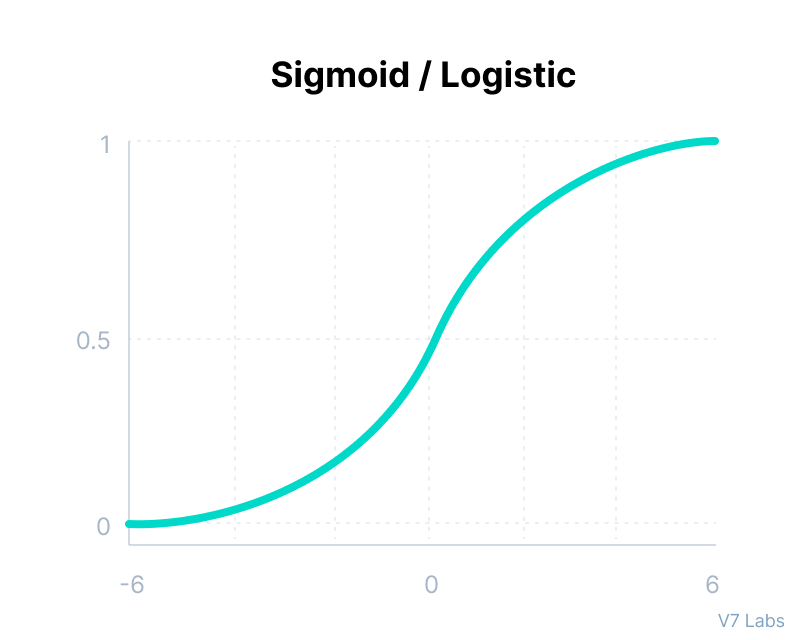

###**2) Tanh Function:** is very similar to the sigmoid activation function, and even has the same S-shape with the difference in output range of -1 to 1.**(f(x)=(e^x-e^-x)/(e^x+e^-x))**

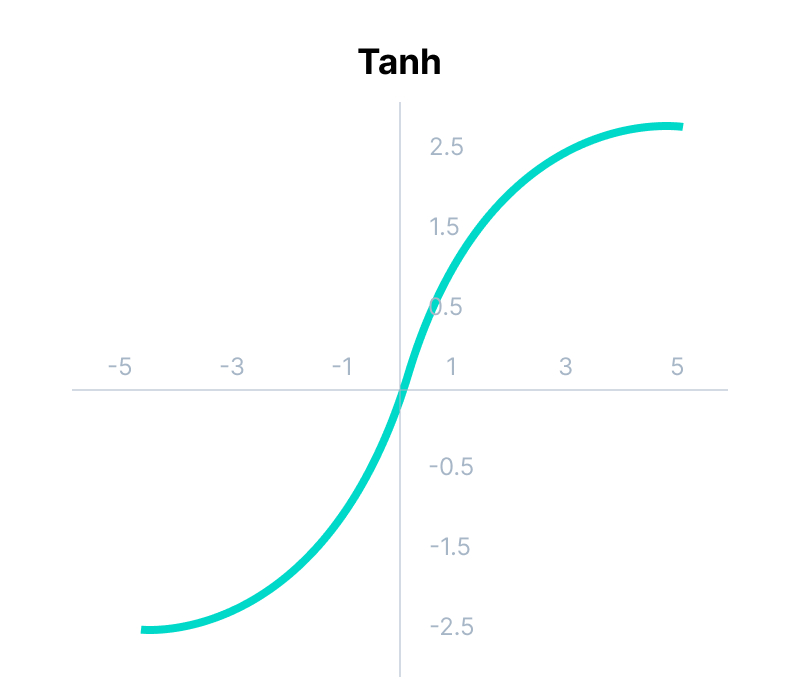

### **3) ReLU Function:** The Rectified Linear Unit is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value  x  it returns that value back. **(f(x)=max(0,x)**

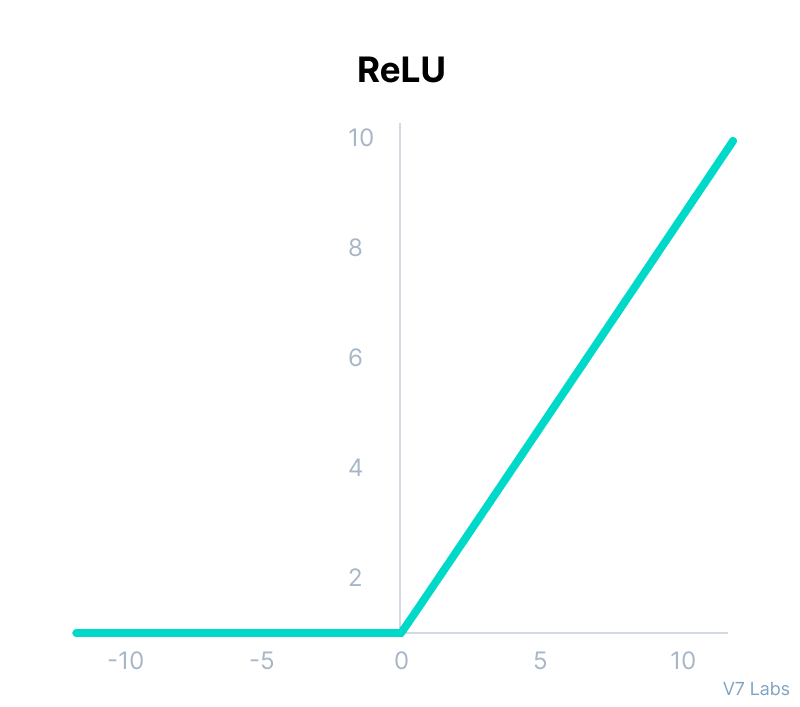

###**4) Softmax Function:** The output of the sigmoid function was in the range of 0 to 1, which can be thought of as probability.softmax activation function make things easy for multi-class classification problems. **(softmax(zi)=exp(zi)/Σjexp(zj))**
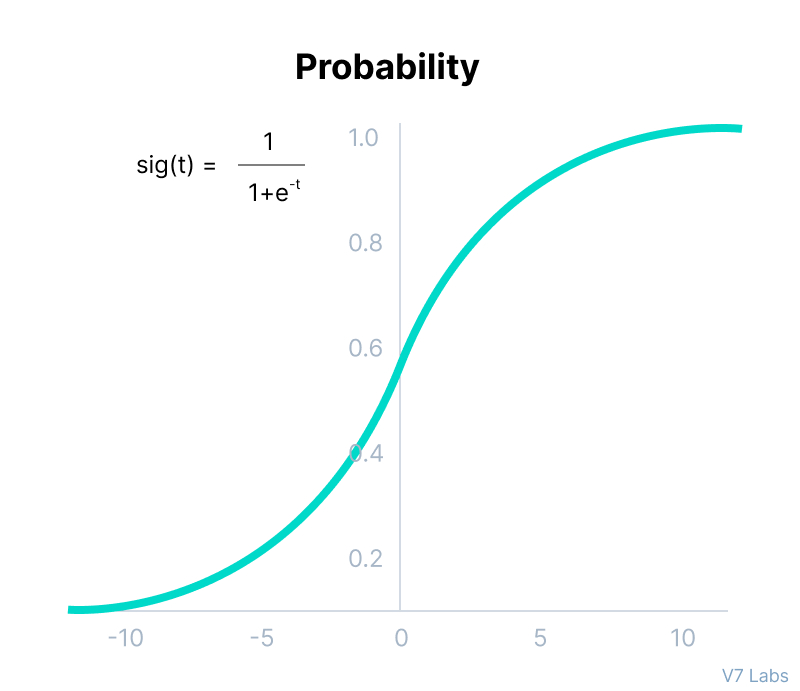

# Neural network model

In [ ]:
NN_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE,1)),
    keras.layers.Dense(120, activation='tanh'), 
    keras.layers.Dense(64, activation='tanh'), 
    keras.layers.Dense(64, activation='tanh'), 

    keras.layers.Dense(32, activation='softmax')
])

In [ ]:
NN_model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
print('Model Details are : ')
print(NN_model.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 120)               491640    
                                                                 
 dense_1 (Dense)             (None, 64)                7744      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
Total params: 505,624
Trainable params: 505,624
Non-trainable params: 0
_________________________________________________________________
None


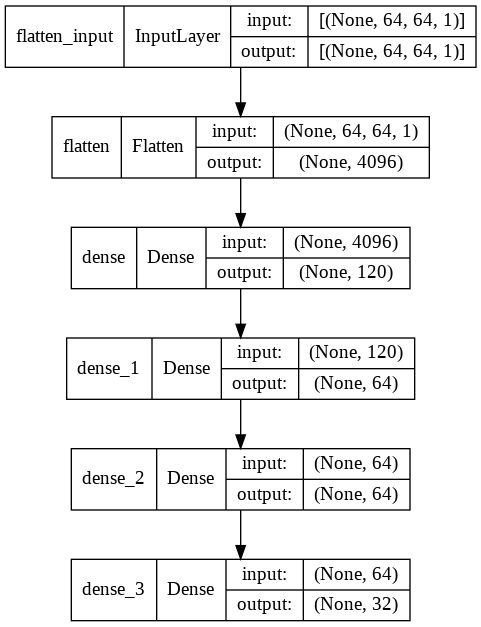

In [ ]:
plot_model(NN_model, to_file="modelNN.png", show_shapes=True)
display(IPythonImage('modelNN.png'))

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
X_val= tf.keras.utils.normalize(X_val, axis=1)


In [ ]:
epochs = 25
history_NN_model=NN_model.fit(X_train, y_train, epochs=epochs,batch_size=64,validation_data=(X_val, y_val),verbose=1)

Epoch 1/25
507/507 [==============================] - 5s 8ms/step - loss: 3.3495 - accuracy: 0.0684 - val_loss: 3.0249 - val_accuracy: 0.1236
Epoch 2/25
507/507 [==============================] - 5s 9ms/step - loss: 2.7086 - accuracy: 0.1999 - val_loss: 2.5396 - val_accuracy: 0.2440
Epoch 3/25
507/507 [==============================] - 7s 14ms/step - loss: 2.2903 - accuracy: 0.3129 - val_loss: 2.1377 - val_accuracy: 0.3446
Epoch 4/25
507/507 [==============================] - 6s 12ms/step - loss: 1.9903 - accuracy: 0.4006 - val_loss: 1.9126 - val_accuracy: 0.4185
Epoch 5/25
507/507 [==============================] - 4s 7ms/step - loss: 1.7808 - accuracy: 0.4590 - val_loss: 1.7382 - val_accuracy: 0.4668
Epoch 6/25
507/507 [==============================] - 5s 9ms/step - loss: 1.6112 - accuracy: 0.5048 - val_loss: 1.6035 - val_accuracy: 0.5013
Epoch 7/25
507/507 [==============================] - 4s 7ms/step - loss: 1.4749 - accuracy: 0.5520 - val_loss: 1.4154 - val_accuracy: 0.5608
Epoc

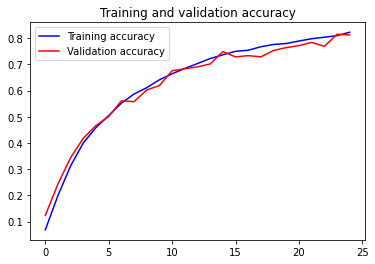

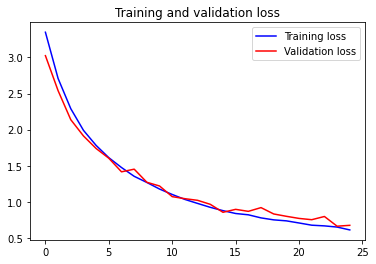

In [ ]:
accuracy = history_NN_model.history['accuracy']
val_accuracy = history_NN_model.history['val_accuracy']
loss = history_NN_model.history['loss']
val_loss = history_NN_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy',color='red')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='red')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
ModelLoss, ModelAccuracy = NN_model.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

338/338 [==============================] - 1s 2ms/step - loss: 0.6895 - accuracy: 0.8066
Test Loss is 0.6894685626029968
Test Accuracy is 0.8065531253814697


# **Convolutional Neural Networks (CNN)**

## **First, let's explain what problem CNN has solved**
Computer vision is a very important area of deep learning and is increasingly being used but one of the main drawbacks in the field of computer vision is the huge amount of data

For example, if we treat an image of 1000 pixels in height and width (3 * 1000 * 1000)
It means 3 million features, which is a very large number, especially since the network has 3 million inputs.
Thus, the first hidden layer is, let it be a thousand units, so the matrix of weights for the first hidden layer is 3.000.000 * 1000, that is, 3 billion elements,

It's a huge number, and it needs a very large number of images and data to avoid OF, and it also needs a high potential of the computer.

**CNN has solved these problems**


## **What is CNN ?**

it is a deep learning algorithm that can take an input image, assign importance (learnable weights and biases) to various aspects/objects in an image and be able to distinguish one from the other

The most common use for CNNs is image classification

## **Now let's get to know the mathematical formula for convoluted networks** 

what’s a convolution? In mathematics a convolution is a process which combines two functions on a set to produce another function on the set. We can think of images as two-dimensional functions. Many important image transformations are convolutions where you convolve the image function with a very small, local function called a “kernel.” The kernel slides to every position of the image and computes a new pixel as a weighted sum of the pixels it floats over, in order to process the spatial structure of the image.

**To understand more, we will give this example :**

If we have a very small image, which is 5 * 5 pixels, which is a black and white image, its matrix will contain only 25 number ,
Each cell contains 1 number and not 3 numbers because it is grayscale
First  we build a small matrix 3 by 3 ( which is called the filter or kernel), to do the convolution of it ,
Its output will be a 3*3 matrix,

**If the process is repeated, the image will be reduced more and more**

**we attaching this animation to make it more clear**



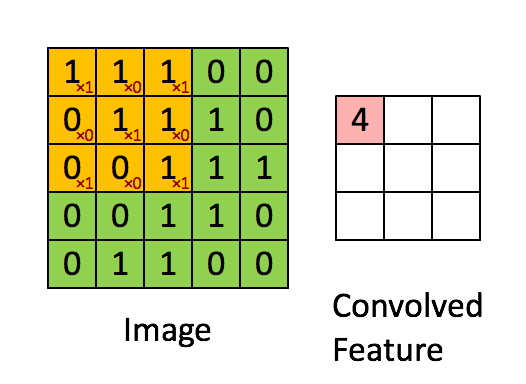

## **Now we will talk about two defects that occur in the convolution process:**

If we have a 6 * 6 pixel image and the filter is 3 * 3, the output will be 4 * 4 matrix, **(n-f+1)**
The first defect:
If the process is repeated, the image will be reduced more and more until it **disappears**, and at that time we will not be able to carry out the process.

The second defect:
Is that the process of convolution, makes the numbers on the edges used a little.
red numbers are used only once, green twice, and yellow three times, while the internal numbers are used more, to pass the wrapped array many times.

**To solve both problems, we do something called padding**

It means that the 6 * 6 matrix is surrounded by a full line of numbers, so that this increases the rows and columns, each of them by 2,Zero are often placed in empty cells, this will solve both problems 

Thus, the matrix became 8 * 8, when the resulting matrix is calculated, it will be 6 * 6, and this means that the size has not changed. Because the new array is 6*6, it will be padded before it is wrapped again.
Also, the numbers that were on the sides have become internal, which means that they will be read many times

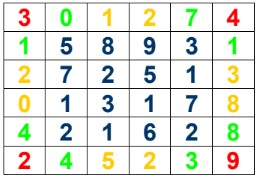

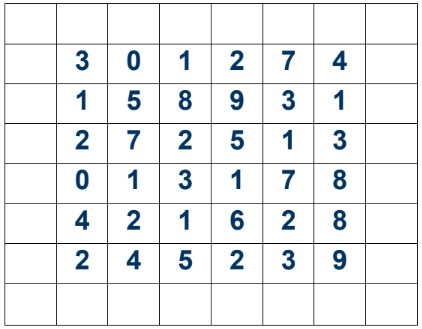

## **Now we will talk about another concept which is the Strided convolution**
This means that the filter, instead of completely scanning the original matrix and moving horizontally and vertically step by step, it is possible to move two steps instead of one.

## **Let’s summarize the dimensions in the following tabel**


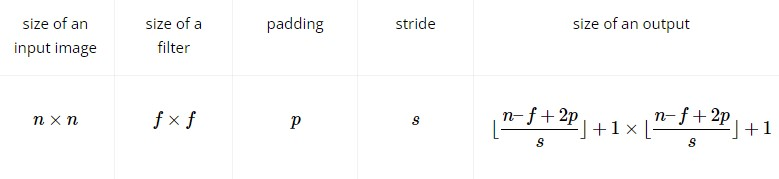

## **Pooling Layer**
The pooling layer replaces the output of the network at certain locations by deriving a summary statistic of the nearby outputs. This helps in reducing the spatial size of the representation, which decreases the required amount of computation and weights. 

There are two types of Pooling: **Max Pooling** and **Average Pooling**. Max Pooling returns the maximum value from the portion of the image covered by the Kernel. On the other hand, Average Pooling returns the average of all the values from the portion of the image covered by the Kernel.

Max Pooling performs a lot better than Average Pooling.

The process of max pooling is actually facilitating and accelerating the network, and the reason may be that the higher number always indicates something prominent and visible, it may be something important (eye, car, gun)

when applying Max Pooling, you specify: (filter, Strided)
filter: the size of the square that will cover an area, to check the larger number
Strided: the steps it will walk
(p may be specified for padding, but this is rare)

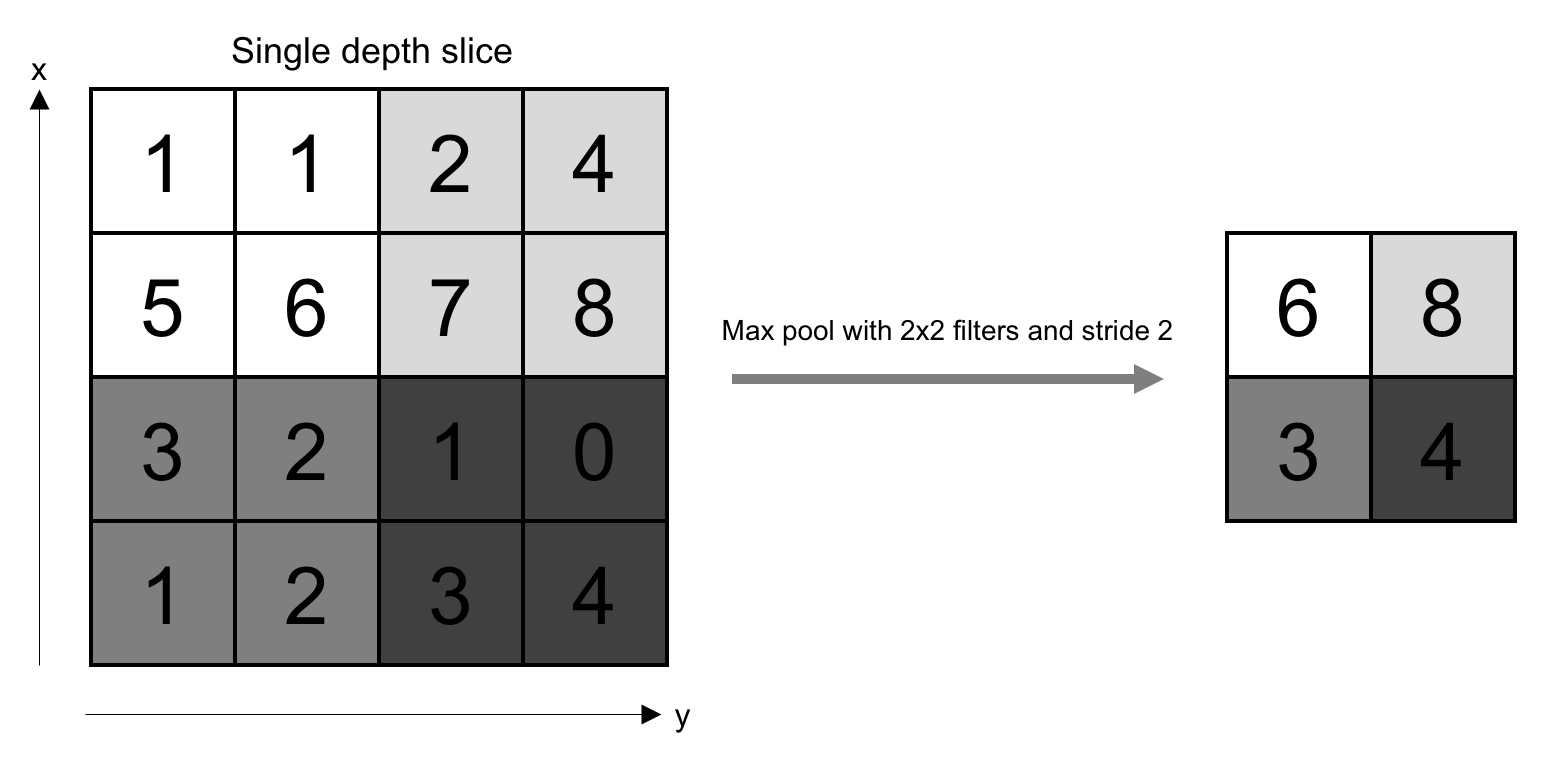

# LeNet


#### LeNet is a CNN structure proposed by Yann LeCun et al. in 1989. In general, it is one of the simplest architectures. It has 2 convolutional and 3 fully-connected layers and the average-pooling layer as we know it now was called a sub-sampling layer and it had trainable weights 

#### LeNet-5 CNN architecture is made up of 7 layers. The layer composition consists of 2 convolutional layers, 2 subsampling layers(average-pooling) and 3 fully connected layers.

In [ ]:
Model1_LeNet5 = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(IMG_SIZE,IMG_SIZE,1)), 
    keras.layers.AveragePooling2D(), 
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh'), 
    keras.layers.AveragePooling2D(), 
    keras.layers.Flatten(), 
    keras.layers.Dense(120, activation='tanh'), 
    keras.layers.Dense(84, activation='tanh'), 
    keras.layers.Dense(32, activation='softmax') 
])

In [ ]:
Model1_LeNet5.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
print('Model Details are : ')
print(Model1_LeNet5.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 30, 30, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 13, 13, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None,

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

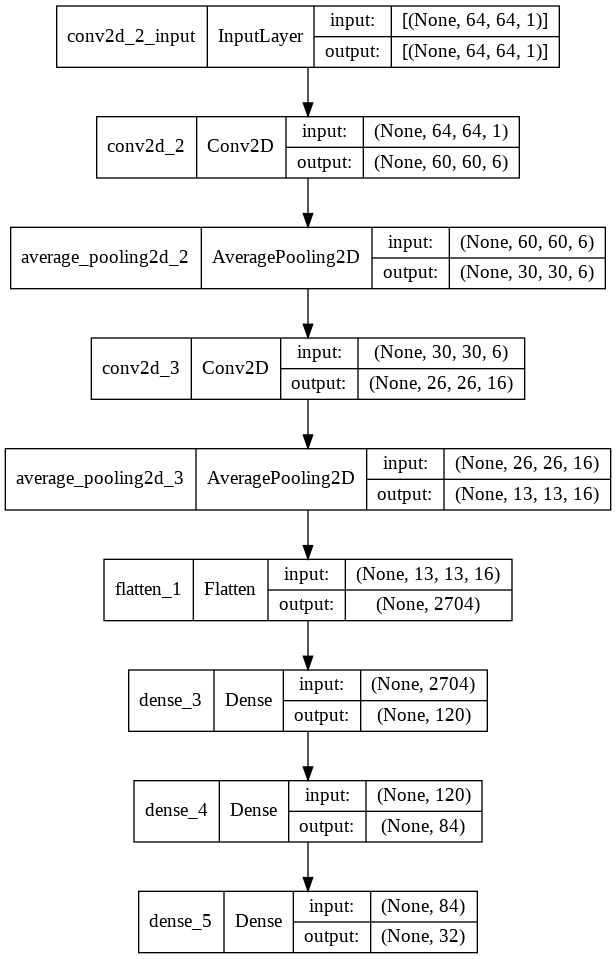

In [ ]:
plot_model(Model1_LeNet5, to_file="model1.png", show_shapes=True)
display(IPythonImage('model1.png'))

In [ ]:
epochs = 25
history_LeNet5=Model1_LeNet5.fit(X_train, y_train, epochs=epochs,batch_size=64,validation_data=(X_val, y_val),verbose=1)

Epoch 1/25
507/507 [==============================] - 15s 11ms/step - loss: 1.9269 - accuracy: 0.4894 - val_loss: 0.9370 - val_accuracy: 0.7792
Epoch 2/25
507/507 [==============================] - 6s 11ms/step - loss: 0.5928 - accuracy: 0.8690 - val_loss: 0.4423 - val_accuracy: 0.9050
Epoch 3/25
507/507 [==============================] - 6s 11ms/step - loss: 0.3141 - accuracy: 0.9324 - val_loss: 0.3421 - val_accuracy: 0.9210
Epoch 4/25
507/507 [==============================] - 6s 12ms/step - loss: 0.2141 - accuracy: 0.9520 - val_loss: 0.2843 - val_accuracy: 0.9342
Epoch 5/25
507/507 [==============================] - 6s 11ms/step - loss: 0.1654 - accuracy: 0.9618 - val_loss: 0.2678 - val_accuracy: 0.9349
Epoch 6/25
507/507 [==============================] - 6s 11ms/step - loss: 0.1205 - accuracy: 0.9711 - val_loss: 0.2473 - val_accuracy: 0.9423
Epoch 7/25
507/507 [==============================] - 6s 12ms/step - loss: 0.0953 - accuracy: 0.9770 - val_loss: 0.2729 - val_accuracy: 0.937

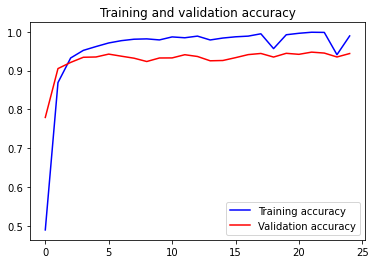

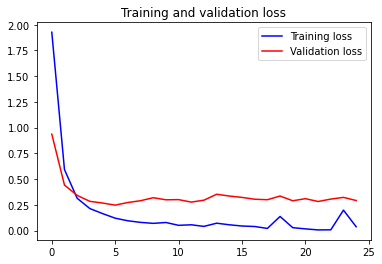

In [ ]:
accuracy = history_LeNet5.history['accuracy']
val_accuracy = history_LeNet5.history['val_accuracy']
loss = history_LeNet5.history['loss']
val_loss = history_LeNet5.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy',color='red')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='red')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
ModelLoss, ModelAccuracy = Model1_LeNet5.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

338/338 [==============================] - 2s 5ms/step - loss: 0.2896 - accuracy: 0.9443
Test Loss is 0.2895872890949249
Test Accuracy is 0.9442799091339111


# AlexNet 

#### AlexNet is a CNN structure designed by Alex Krizhevsky in collaboration with Ilya Sutskever and Geoffrey Hinton, who was Krizhevsky's Ph.D. advisor.


#### AlexNet has 8 layers — 5 convolutional and 3 fully-connected
#### The architecture consists of 5 Convolutional layers, with the 1st, 2nd and 5th having Max-Pooling layers for proper feature extraction. The Max-Pooling layers are overlapped having strides of 2 with filter size 3×3.

In [ ]:
Model2_AlexNet = keras.models.Sequential([

  keras.layers.Conv2D(filters = 96,kernel_size = (3, 3),  activation='relu',strides = (1, 1),padding = 'valid', input_shape=(IMG_SIZE,IMG_SIZE,1)),
  keras.layers.MaxPooling2D(pool_size = (2, 2),strides = (2, 2), padding = 'valid'), 
  keras.layers.BatchNormalization(),

# 2nd Convolutional Layer

  keras.layers.Conv2D(filters = 256, kernel_size = (3, 3),strides = (1, 1),  activation='relu',padding = 'valid'),
  keras.layers.MaxPooling2D(pool_size = (2, 2),strides = (2, 2), padding = 'valid'), 
  keras.layers.BatchNormalization(),

# 3rd Convolutional Layer
  keras.layers.Conv2D(filters = 384,  activation='relu',kernel_size = (3, 3),strides = (1, 1), padding = 'valid'),
  keras.layers.BatchNormalization(),

# 4th Convolutional Layer
  keras.layers.Conv2D(filters = 384, kernel_size = (3, 3),strides = (1, 1),activation='relu',padding = 'valid'),
  keras.layers.BatchNormalization(),

# 5th Convolutional Layer
  keras.layers.Conv2D(filters = 256, kernel_size = (3, 3),strides = (1, 1), activation='relu',padding = 'valid'),
  keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2),padding = 'valid'),
  keras.layers.BatchNormalization(),

# Flattening
  keras.layers.Flatten(), 

# 1st Dense Layer
  keras.layers.Dense(4096, activation='relu'),
  keras.layers.Dropout(rate=0.4),
  keras.layers.BatchNormalization(),

# 2nd Dense Layer
  keras.layers.Dense(4096, activation='relu'),
  keras.layers.Dropout(rate=0.4),
  keras.layers.BatchNormalization(),

# Output Softmax Layer
  keras.layers.Dense(32, activation='softmax')
     ])


In [ ]:
Model2_AlexNet.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
print('Model Details are : ')
print(Model2_AlexNet.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 96)        960       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 31, 31, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 256)       221440    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                 

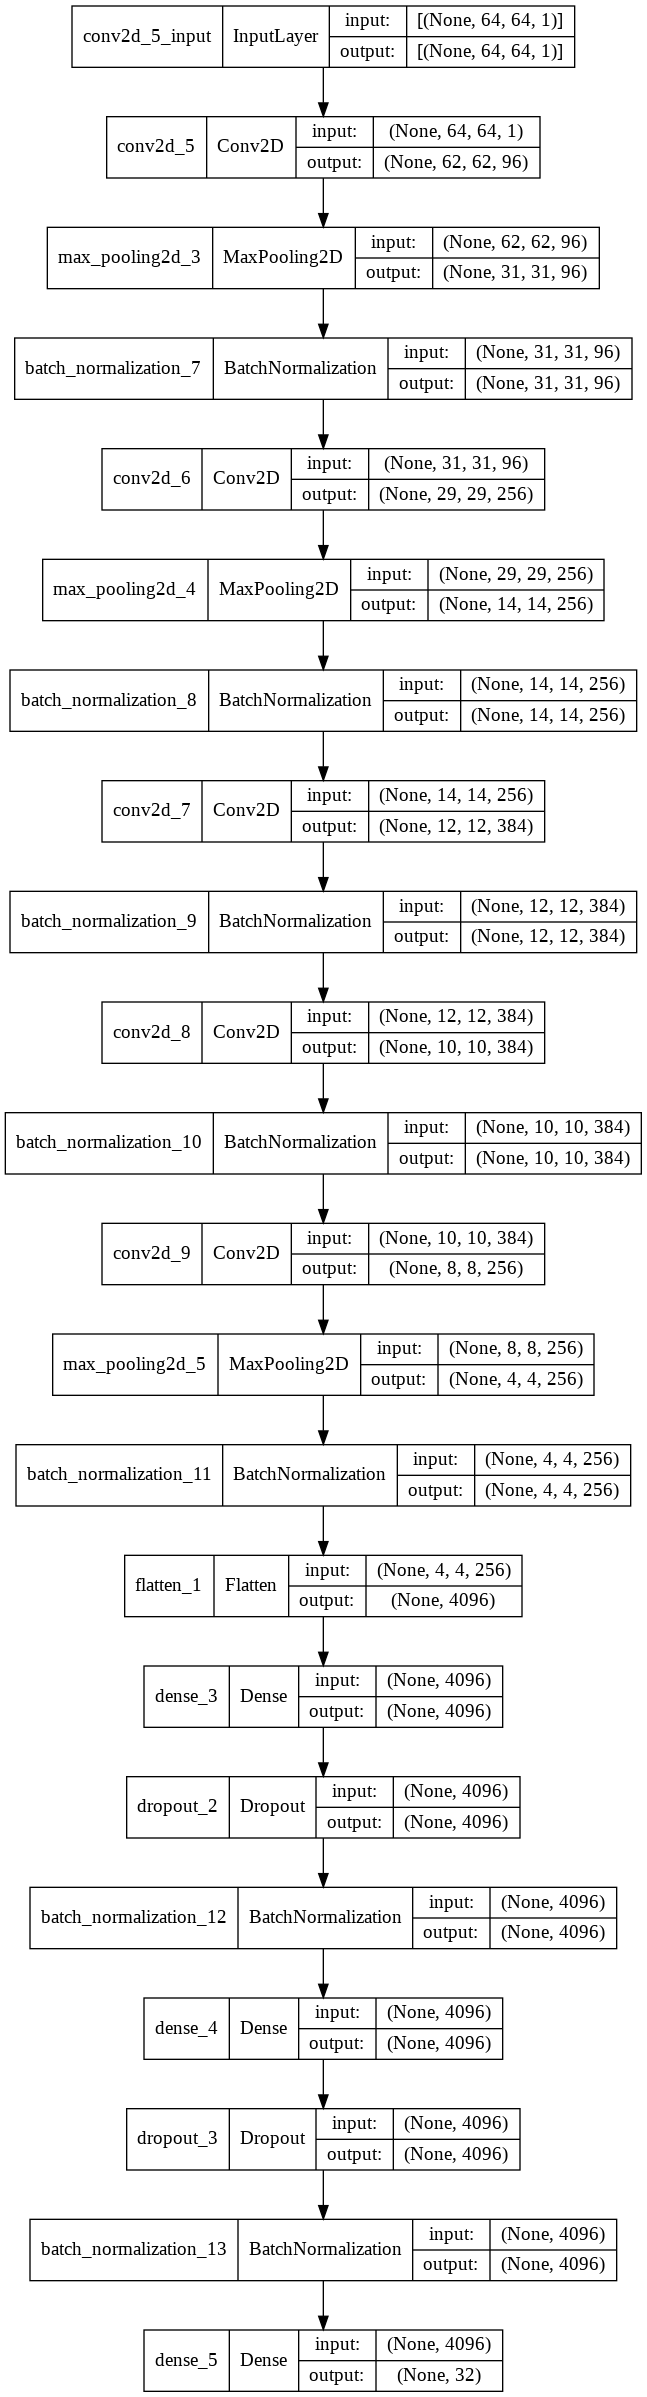

In [ ]:
plot_model(Model2_AlexNet, to_file="model2.png", show_shapes=True)
display(IPythonImage('model2.png'))

In [ ]:
epochs = 25
history_AlexNet=Model2_AlexNet.fit(X_train, y_train, epochs=epochs,batch_size=64,validation_data=(X_val, y_val),verbose=1)

Epoch 1/25
507/507 [==============================] - 92s 153ms/step - loss: 1.2228 - accuracy: 0.6900 - val_loss: 1.6012 - val_accuracy: 0.6725
Epoch 2/25
507/507 [==============================] - 80s 157ms/step - loss: 0.3217 - accuracy: 0.9071 - val_loss: 1.0760 - val_accuracy: 0.7437
Epoch 3/25
507/507 [==============================] - 75s 148ms/step - loss: 0.1942 - accuracy: 0.9460 - val_loss: 0.6051 - val_accuracy: 0.8771
Epoch 4/25
507/507 [==============================] - 75s 147ms/step - loss: 0.1662 - accuracy: 0.9540 - val_loss: 1.0493 - val_accuracy: 0.7844
Epoch 5/25
507/507 [==============================] - 74s 147ms/step - loss: 0.1710 - accuracy: 0.9538 - val_loss: 0.3004 - val_accuracy: 0.9185
Epoch 6/25
507/507 [==============================] - 75s 147ms/step - loss: 0.1289 - accuracy: 0.9667 - val_loss: 0.1844 - val_accuracy: 0.9568
Epoch 7/25
507/507 [==============================] - 74s 147ms/step - loss: 0.1127 - accuracy: 0.9710 - val_loss: 0.2904 - val_ac

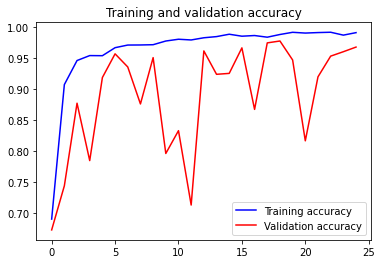

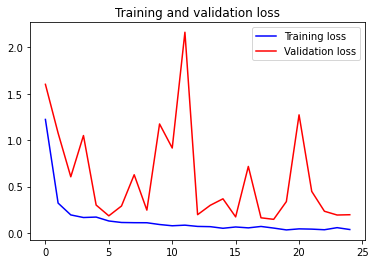

In [ ]:
accuracy = history_AlexNet.history['accuracy']
val_accuracy = history_AlexNet.history['val_accuracy']
loss = history_AlexNet.history['loss']
val_loss = history_AlexNet.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy',color='red')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='red')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
ModelLoss, ModelAccuracy = Model2_AlexNet.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

338/338 [==============================] - 10s 28ms/step - loss: 0.1818 - accuracy: 0.9694
Test Loss is 0.18180032074451447
Test Accuracy is 0.9693632125854492


# VGG

#### VGG16 is a CNN structure designed by folks at Visual Geometry Group (VGG) invented the VGG-16

#### VGG16 has 13 convolutional and 3 fully-connected layers ,the 16 in VGG16 refers to it has 16 layers

#### most unique thing in VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2

In [ ]:
Model3_VGG16 = keras.models.Sequential([
                                        
  keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu",input_shape=(IMG_SIZE,IMG_SIZE,1)),
  keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu"),
  keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),

  keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"),
  keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"),
  keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),

  keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"),
  keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"),
  keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"),
  #keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),

  keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"),
  keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"),
  keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"),
  keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),

  keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"),
  keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"),
  keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"),

  keras.layers.Flatten(), 
  keras.layers.Dense(120,activation="relu"),
  keras.layers.Dense(64,activation="relu"),
  keras.layers.Dense(32, activation="softmax")
])



In [ ]:
Model3_VGG16.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
print('Model Details are : ')
print(Model3_VGG16.summary())

Model Details are : 
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_129 (Conv2D)         (None, 64, 64, 16)        160       
                                                                 
 conv2d_130 (Conv2D)         (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_131 (Conv2D)         (None, 32, 32, 16)        2320      
                                                                 
 conv2d_132 (Conv2D)         (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                            

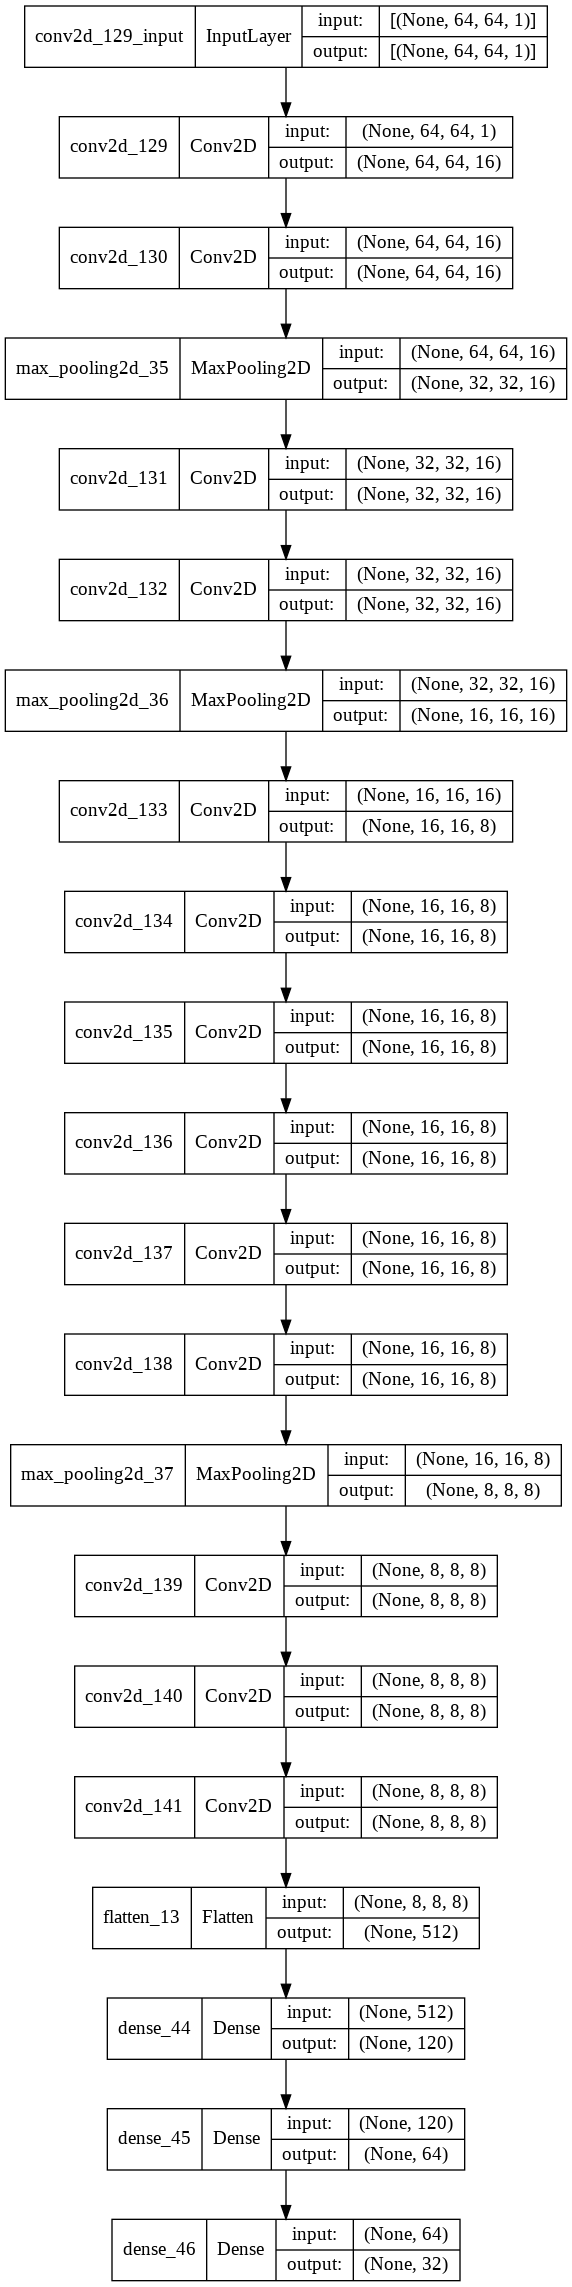

In [ ]:
plot_model(Model3_VGG16, to_file="model3.png", show_shapes=True)
display(IPythonImage('model3.png'))

In [ ]:
epochs = 25
history_VGG16=Model3_VGG16.fit(X_train, y_train, epochs=epochs,batch_size=64,validation_data=(X_val, y_val),verbose=1)

Epoch 1/25
507/507 [==============================] - 20s 38ms/step - loss: 1.9638 - accuracy: 0.4264 - val_loss: 0.9586 - val_accuracy: 0.7022
Epoch 2/25
507/507 [==============================] - 19s 37ms/step - loss: 0.7103 - accuracy: 0.7876 - val_loss: 0.6089 - val_accuracy: 0.8191
Epoch 3/25
507/507 [==============================] - 19s 37ms/step - loss: 0.4488 - accuracy: 0.8693 - val_loss: 0.4489 - val_accuracy: 0.8812
Epoch 4/25
507/507 [==============================] - 18s 36ms/step - loss: 0.3339 - accuracy: 0.9037 - val_loss: 0.3738 - val_accuracy: 0.9109
Epoch 5/25
507/507 [==============================] - 19s 37ms/step - loss: 0.2838 - accuracy: 0.9182 - val_loss: 0.3499 - val_accuracy: 0.9171
Epoch 6/25
507/507 [==============================] - 18s 36ms/step - loss: 0.2550 - accuracy: 0.9250 - val_loss: 0.3463 - val_accuracy: 0.9094
Epoch 7/25
507/507 [==============================] - 19s 37ms/step - loss: 0.2104 - accuracy: 0.9375 - val_loss: 0.3201 - val_accuracy:

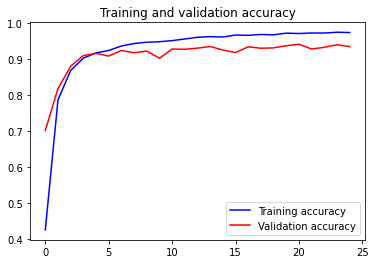

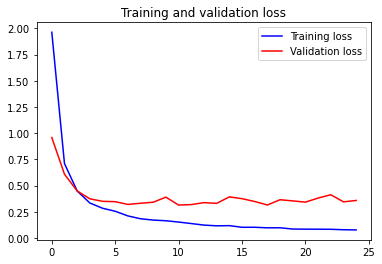

In [ ]:
accuracy = history_VGG16.history['accuracy']
val_accuracy = history_VGG16.history['val_accuracy']
loss = history_VGG16.history['loss']
val_loss = history_VGG16.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy',color='red')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='red')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
ModelLoss, ModelAccuracy = Model3_VGG16.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

338/338 [==============================] - 3s 8ms/step - loss: 0.3240 - accuracy: 0.9373
Test Loss is 0.3240385949611664
Test Accuracy is 0.9373379945755005


# ResNet

#### ResNet, which was proposed in 2015 by researchers at Microsoft Research introduced a new architecture called Residual Network.

#### Every subsequent winning architecture uses more layers in a deep neural network to reduce the error rate. This works for less number of layers, but when we increase the number of layers, there is a common problem in deep learning associated with that called Vanishing/Exploding gradient. This causes the gradient to become 0 or too large. Thus when we increases number of layers, the training and test error rate also increases

#### In this network we use a technique called skip connections . The skip connection skips training from a few layers and connects directly to the output. 
#### The approach behind this network is instead of layers learn the underlying mapping, we allow network fit the residual mapping. So, instead of say H(x), initial mapping, let the network fit, F(x) := H(x) – x which gives H(x) := F(x) + x.

#### The advantage of adding this type of **skip connection** is because if any layer hurt the performance of architecture then it will be skipped by regularization.

In [ ]:
layer_in = Input(shape=(64, 64, 1))

merge_input = Conv2D(16, (1,1), padding='same', activation='relu')(layer_in)
conv1 = Conv2D(16, (3,3), padding='same', activation='relu')(layer_in)

conv2 = Conv2D(16, (3,3), padding='same', activation='linear')(conv1)
	# add filters, assumes filters/channels last
layer_out = add([conv2, merge_input])
	# activation function
layer_out = Activation('relu')(layer_out)

layer_Max = MaxPooling2D((8,8), strides=(1,1))(layer_out)


In [ ]:
flat1 = Flatten()(layer_Max)

dense1 = Dense(512, activation='relu')(flat1)
dense2 = Dense(120, activation='relu')(dense1)
dense3 = Dense(120, activation='relu')(dense2)
output = Dense(32, activation='softmax')(dense3)

In [ ]:
model4_ResNet = Model(inputs=layer_in, outputs=output)


In [ ]:
print('Model Details are : ')
print(model4_ResNet.summary())

Model Details are : 
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 64, 64, 16)   160         ['input_2[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 64, 64, 16)   2320        ['conv2d_5[0][0]']               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 64, 64, 16)   32          ['input_2[0][0]']                
                                                                       

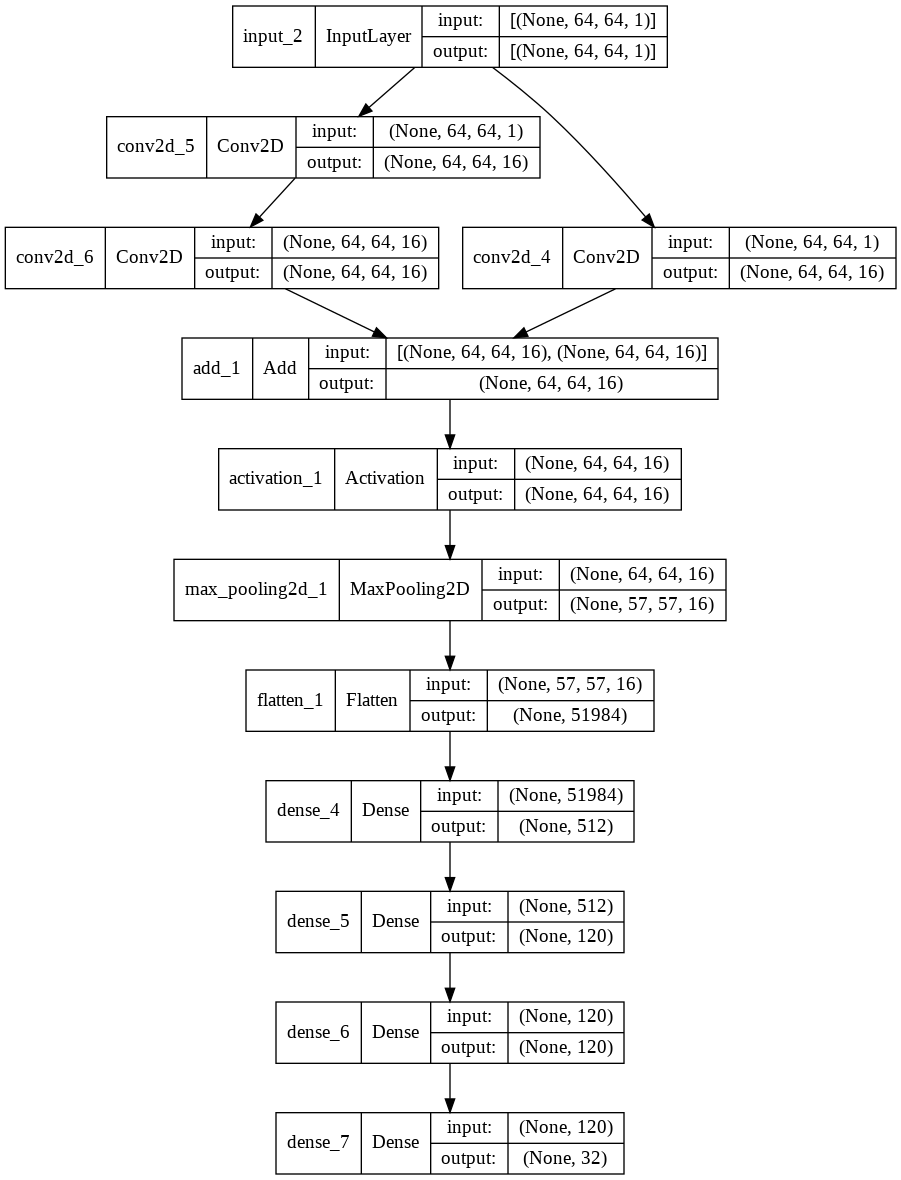

In [ ]:
plot_model(model4_ResNet, to_file="model4.png", show_shapes=True)
display(IPythonImage('model4.png'))

In [ ]:
model4_ResNet.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
epochs = 25
history_ResNet=model4_ResNet.fit(X_train, y_train, epochs=epochs,batch_size=64,validation_data=(X_val, y_val),verbose=1)

Epoch 1/25
507/507 [==============================] - 35s 68ms/step - loss: 64.3822 - accuracy: 0.1118 - val_loss: 2.6831 - val_accuracy: 0.2365
Epoch 2/25
507/507 [==============================] - 34s 67ms/step - loss: 2.5045 - accuracy: 0.2796 - val_loss: 2.3832 - val_accuracy: 0.3178
Epoch 3/25
507/507 [==============================] - 34s 67ms/step - loss: 2.2973 - accuracy: 0.3339 - val_loss: 2.2551 - val_accuracy: 0.3430
Epoch 4/25
507/507 [==============================] - 34s 67ms/step - loss: 2.0142 - accuracy: 0.4008 - val_loss: 1.8249 - val_accuracy: 0.4543
Epoch 5/25
507/507 [==============================] - 34s 67ms/step - loss: 1.6570 - accuracy: 0.4982 - val_loss: 1.5407 - val_accuracy: 0.5370
Epoch 6/25
507/507 [==============================] - 36s 70ms/step - loss: 1.4045 - accuracy: 0.5776 - val_loss: 1.3426 - val_accuracy: 0.6003
Epoch 7/25
507/507 [==============================] - 34s 67ms/step - loss: 1.2027 - accuracy: 0.6402 - val_loss: 1.2540 - val_accuracy

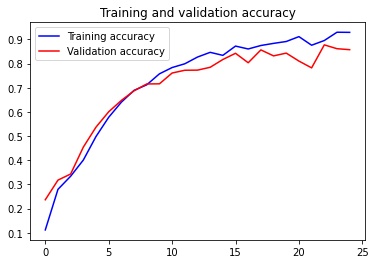

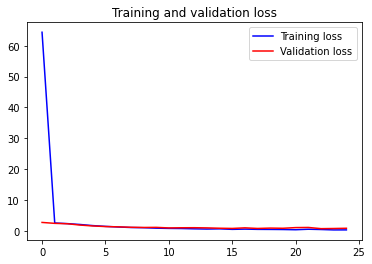

In [ ]:
accuracy = history_ResNet.history['accuracy']
val_accuracy = history_ResNet.history['val_accuracy']
loss = history_ResNet.history['loss']
val_loss = history_ResNet.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy',color='red')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='red')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
ModelLoss, ModelAccuracy = model4_ResNet.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

338/338 [==============================] - 4s 13ms/step - loss: 0.7508 - accuracy: 0.8568
Test Loss is 0.7508230805397034
Test Accuracy is 0.8568122982978821


# Inception 

####Here comes an important question, when I design a network , do I choose the filter with dimensions of 1*1, 3*3, 5*5 or what? ?
####Here we use a technique: **inception network**  to solve the problem by combining them together

#### Inception Modules are incorporated into convolutional neural networks (CNNs) as a way of reducing computational expense. As a neural net deals with a vast array of images, with wide variation in the featured image content, also known as the salient parts, they need to be designed appropriately. The most simplified version of an inception module works by performing a convolution on an input with not one, but three different sizes of filters (1x1, 3x3, 5x5). Also, max pooling is performed. Then, the resulting outputs are concatenated and sent to the next layer. By structuring the CNN to perform its convolutions on the same level, the network gets progressively wider, not deeper. 

In [ ]:
input_img = Input(shape=(64, 64, 1))

### 1st layer
layer_1 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)

layer_2 = Conv2D(10, (3,3), padding='same', activation='relu')(input_img)

layer_3 = Conv2D(10, (5,5), padding='same', activation='relu')(input_img)

layer_4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)

mid_1 = concatenate([layer_1, layer_2, layer_3], axis = 3)

layer_5 = Conv2D(4, (3,3), activation='relu')(mid_1)

layer_Max = MaxPooling2D((8,8), strides=(1,1))(layer_5)


In [ ]:
flat_1 = Flatten()(layer_Max)

dense_1 = Dense(1200, activation='relu')(flat_1)
dense_2 = Dense(600, activation='relu')(dense_1)
dense_3 = Dense(150, activation='relu')(dense_2)
output = Dense(32, activation='softmax')(dense_3)

In [ ]:
model5_Inception = Model([input_img], output)



In [ ]:
print('Model Details are : ')
print(model5_Inception.summary())

Model Details are : 
Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_43 (InputLayer)          [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_222 (Conv2D)            (None, 64, 64, 10)   20          ['input_43[0][0]']               
                                                                                                  
 conv2d_223 (Conv2D)            (None, 64, 64, 10)   100         ['input_43[0][0]']               
                                                                                                  
 conv2d_224 (Conv2D)            (None, 64, 64, 10)   260         ['input_43[0][0]']               
                                                                      

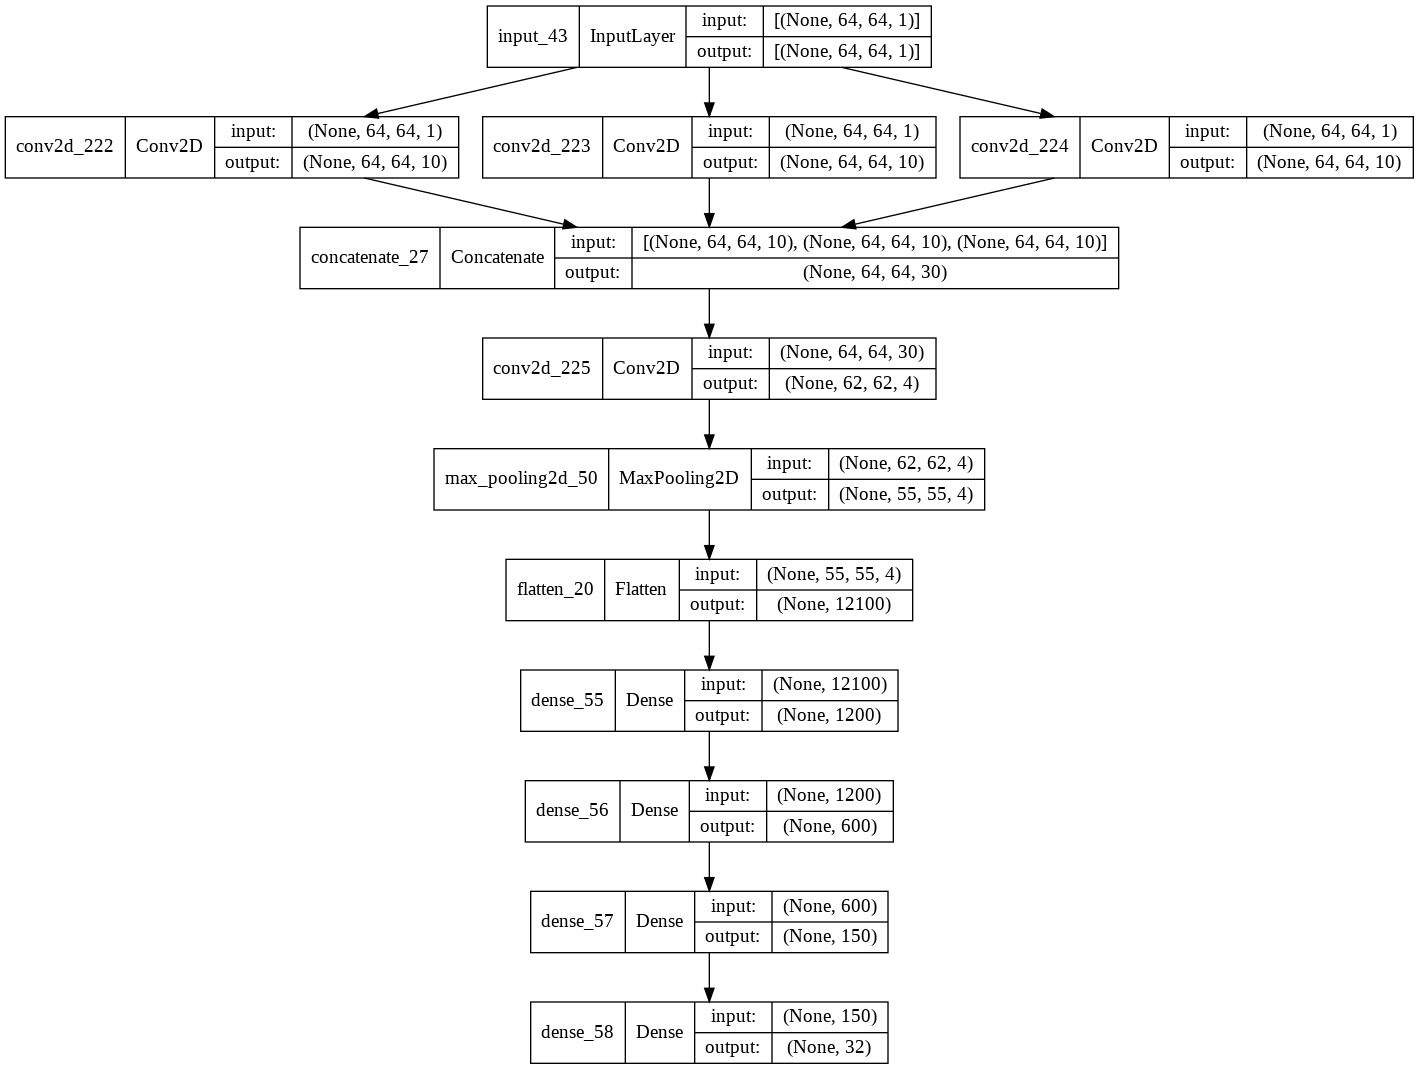

In [ ]:
plot_model(model5_Inception, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
model5_Inception.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
epochs = 25
history_LeNet5=model5_Inception.fit(X_train, y_train, epochs=epochs,batch_size=64,validation_data=(X_val, y_val),verbose=1)

Epoch 1/25
507/507 [==============================] - 23s 43ms/step - loss: 6.2170 - accuracy: 0.0915 - val_loss: 2.9734 - val_accuracy: 0.1760
Epoch 2/25
507/507 [==============================] - 21s 42ms/step - loss: 2.8515 - accuracy: 0.2145 - val_loss: 2.8018 - val_accuracy: 0.2332
Epoch 3/25
507/507 [==============================] - 21s 42ms/step - loss: 2.7650 - accuracy: 0.2378 - val_loss: 2.7638 - val_accuracy: 0.2452
Epoch 4/25
507/507 [==============================] - 21s 42ms/step - loss: 2.7276 - accuracy: 0.2463 - val_loss: 2.7503 - val_accuracy: 0.2466
Epoch 5/25
507/507 [==============================] - 21s 42ms/step - loss: 2.6990 - accuracy: 0.2540 - val_loss: 2.7028 - val_accuracy: 0.2613
Epoch 6/25
507/507 [==============================] - 21s 42ms/step - loss: 2.6840 - accuracy: 0.2601 - val_loss: 2.6999 - val_accuracy: 0.2663
Epoch 7/25
507/507 [==============================] - 21s 42ms/step - loss: 2.6554 - accuracy: 0.2685 - val_loss: 2.6773 - val_accuracy:

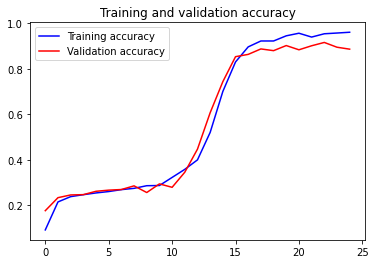

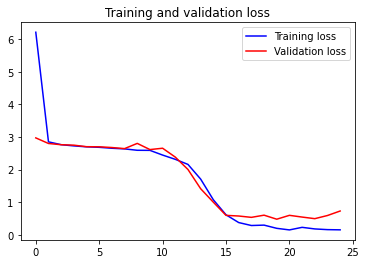

In [ ]:
accuracy = history_LeNet5.history['accuracy']
val_accuracy = history_LeNet5.history['val_accuracy']
loss = history_LeNet5.history['loss']
val_loss = history_LeNet5.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy',color='red')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='red')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
ModelLoss, ModelAccuracy = model5_Inception.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

338/338 [==============================] - 3s 9ms/step - loss: 0.7641 - accuracy: 0.8749
Test Loss is 0.7641296982765198
Test Accuracy is 0.8748611807823181


# Designing Model Architecture

In [ ]:
def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):


  sign_CNN_Model = keras.models.Sequential([
    
        keras.layers.Conv2D(100,kernel_size=(3,3), kernel_initializer=kernel_initializer,activation=activation,input_shape=(IMG_SIZE,IMG_SIZE,1)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Dropout(rate=0.2),
    
        keras.layers.Conv2D(50,kernel_size=(3,3), kernel_initializer=kernel_initializer,activation=activation),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Dropout(rate=0.2), 
    
        keras.layers.Conv2D(30,kernel_size=(3,3), kernel_initializer=kernel_initializer,activation=activation),    
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(2,2),
    
        keras.layers.Flatten() ,
    
        keras.layers.Dense(128,activation=activation) ,
        keras.layers.Dropout(rate=0.2) , 
        keras.layers.BatchNormalization(),
    
        keras.layers.Dense(64,activation=activation) ,    
        keras.layers.BatchNormalization(),
    
        keras.layers.Dense(64,activation=activation) ,    
        keras.layers.BatchNormalization(),
    
        keras.layers.Dense(32,activation='softmax') ,
        ])
  sign_CNN_Model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  return sign_CNN_Model

## Model Summary and Visualization

In [ ]:
sign_CNN_Model = create_model()

print('Model Details are : ')
print(sign_CNN_Model.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 100)       1000      
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 100)      400       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 100)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 100)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 50)        45050     
                                                                 
 batch_normalization_1 (Batc  (None

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

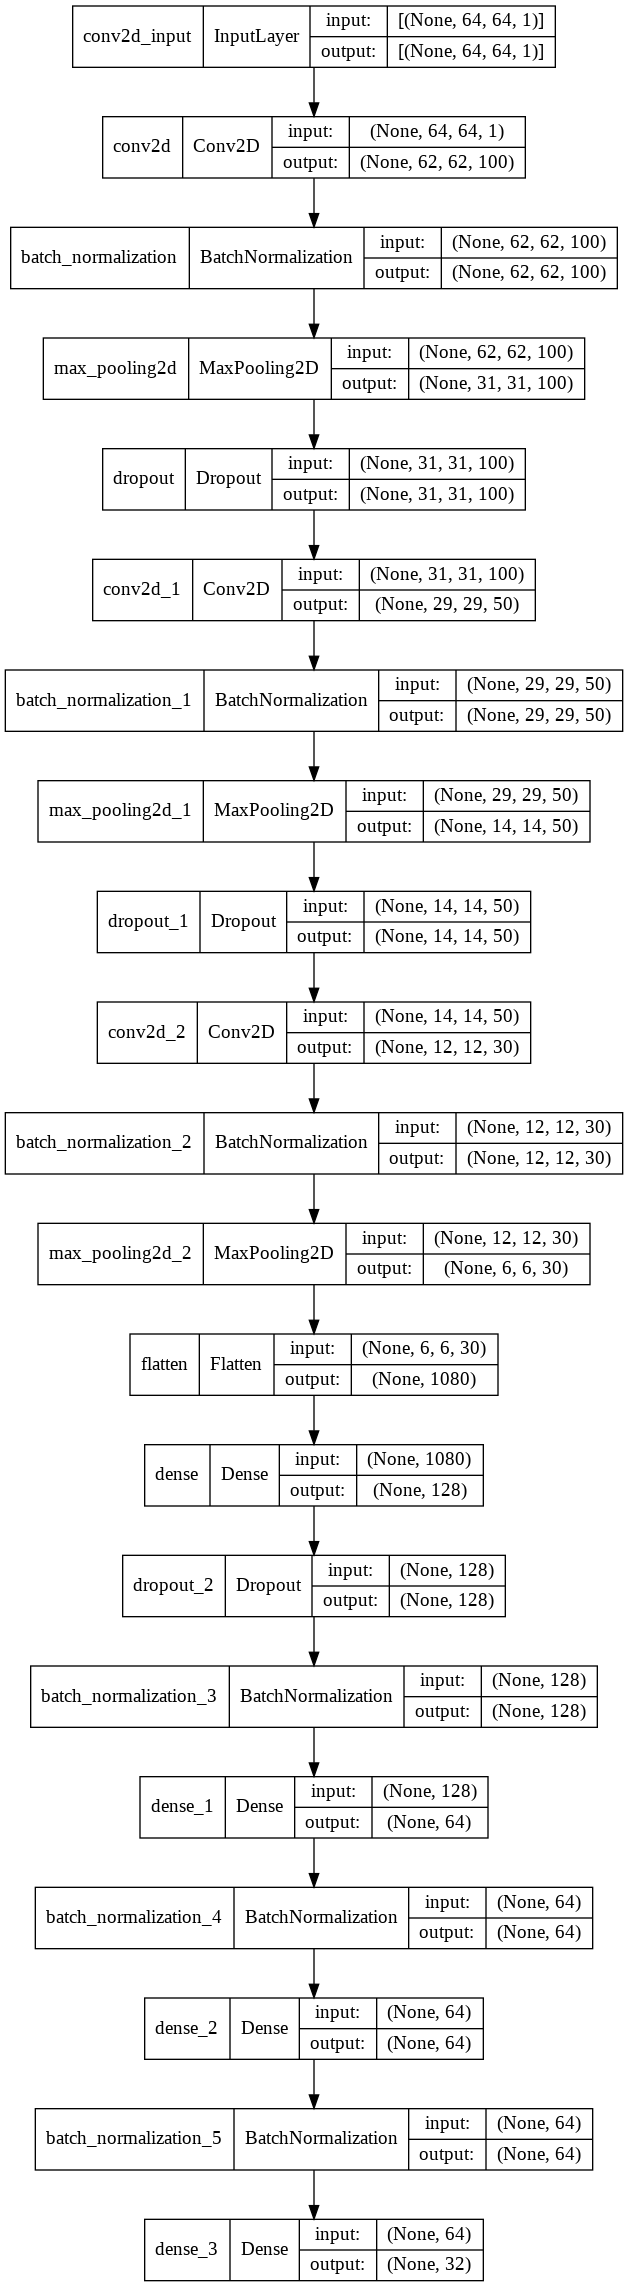

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(sign_CNN_Model, to_file="model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('model.png'))

## We will try different models with different parameters to find the best parameter values.



In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define the grid search parameters
optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear', 'tanh']

param_grid = dict(optimizer=optimizer, kernel_initializer=kernel_initializer, activation=activation)

# count number of different parameters values combinations
parameters_number = 1
for x in param_grid:
  parameters_number = parameters_number * len(param_grid[x]) 
print("Number of different parameter combinations = {}".format(parameters_number))

Number of different parameter combinations = 24


In [ ]:
epochs = 5
batch_size = 64 

#creating the models with different hyperparameters
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(a, b, c)
    curr_model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=epochs, batch_size=batch_size, verbose=1)
    print("=============================================================================")

{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Epoch 1/5
507/507 [==============================] - 37s 50ms/step - loss: 1.7905 - accuracy: 0.4845 - val_loss: 1.6907 - val_accuracy: 0.5065
Epoch 2/5
507/507 [==============================] - 25s 49ms/step - loss: 0.6547 - accuracy: 0.7994 - val_loss: 0.9814 - val_accuracy: 0.6952
Epoch 3/5
507/507 [==============================] - 25s 49ms/step - loss: 0.4180 - accuracy: 0.8716 - val_loss: 0.4639 - val_accuracy: 0.8606
Epoch 4/5
507/507 [==============================] - 25s 49ms/step - loss: 0.3247 - accuracy: 0.9027 - val_loss: 0.6619 - val_accuracy: 0.7992
Epoch 5/5
507/507 [==============================] - 25s 49ms/step - loss: 0.2619 - accuracy: 0.9222 - val_loss: 0.4721 - val_accuracy: 0.8717
{'optimizer': 'RMSprop', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
507/507 [==============================] - 28s 50ms/step - loss: 1.8535 - accuracy: 0.4655 - val_loss: 1.1587 - val_

In [ ]:
sign_CNN_Model=create_model(optimizer='adam', kernel_initializer='uniform', activation='relu')

#sign_CNN_Model=create_model(optimizer='Nadam', kernel_initializer='uniform', activation='linear')


In [ ]:
epochs = 15
history=sign_CNN_Model.fit(X_train, y_train, epochs=epochs,batch_size=64,validation_data=(X_val, y_val),verbose=1)

Epoch 1/15
507/507 [==============================] - 40s 51ms/step - loss: 1.9875 - accuracy: 0.4290 - val_loss: 1.3157 - val_accuracy: 0.6032
Epoch 2/15
507/507 [==============================] - 24s 46ms/step - loss: 0.7859 - accuracy: 0.7556 - val_loss: 1.3355 - val_accuracy: 0.5904
Epoch 3/15
507/507 [==============================] - 24s 46ms/step - loss: 0.4869 - accuracy: 0.8514 - val_loss: 0.8031 - val_accuracy: 0.7662
Epoch 4/15
507/507 [==============================] - 23s 46ms/step - loss: 0.3687 - accuracy: 0.8870 - val_loss: 0.5183 - val_accuracy: 0.8364
Epoch 5/15
507/507 [==============================] - 24s 47ms/step - loss: 0.2883 - accuracy: 0.9118 - val_loss: 1.5225 - val_accuracy: 0.5902
Epoch 6/15
507/507 [==============================] - 24s 46ms/step - loss: 0.2490 - accuracy: 0.9243 - val_loss: 0.2154 - val_accuracy: 0.9442
Epoch 7/15
507/507 [==============================] - 23s 46ms/step - loss: 0.2135 - accuracy: 0.9351 - val_loss: 0.2094 - val_accuracy:

## plot training and validation accuracy

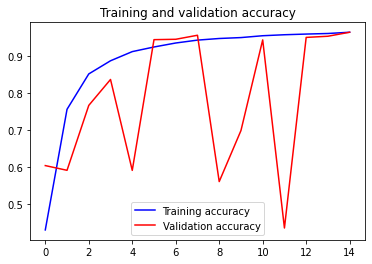

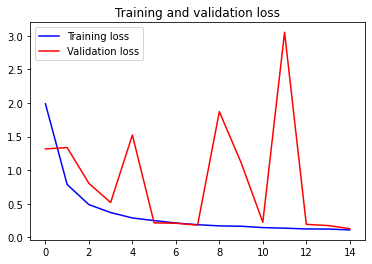

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy',color='red')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='red')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## evluate test data

In [ ]:
ModelLoss, ModelAccuracy = sign_CNN_Model.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

338/338 [==============================] - 5s 13ms/step - loss: 0.1329 - accuracy: 0.9655
Test Loss is 0.13288331031799316
Test Accuracy is 0.9654757380485535


In [ ]:
sign_CNN_Model.save("sign_CNN_Model1.h5")

In [ ]:
loaded_model = load_model("sign_CNN_Model1.h5")
ModelLoss, ModelAccuracy = loaded_model.evaluate(X_test, y_test)

338/338 [==============================] - 5s 14ms/step - loss: 0.1329 - accuracy: 0.9655


# predict new data

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/predict_Data.zip'


Archive:  /content/drive/MyDrive/Colab Notebooks/predict_Data.zip
   creating: predict_Data/
  inflating: predict_Data/AIN (2114).jpg  
  inflating: predict_Data/AL (1343).jpg  
  inflating: predict_Data/Aleff (1672).JPG  
  inflating: predict_Data/BB (1791).jpg  
  inflating: predict_Data/DAL (1634).jpg  
  inflating: predict_Data/DHA (1723).jpg  
  inflating: predict_Data/DHAD (1670).jpg  
  inflating: predict_Data/FA (1955).jpg  
  inflating: predict_Data/GAAF (1705).jpg  
  inflating: predict_Data/GHAIN (1977).jpg  
  inflating: predict_Data/HA (1592).jpg  
  inflating: predict_Data/HAA (1526).jpg  
  inflating: predict_Data/JEEM (1552).jpg  
  inflating: predict_Data/KAAF (1774).jpg  
  inflating: predict_Data/KHAA (1607).jpg  
  inflating: predict_Data/LA (1746).jpg  
  inflating: predict_Data/LAAM (1832).jpg  
  inflating: predict_Data/MEEM (1765).jpg  
  inflating: predict_Data/Nun (1819).jpg  
  inflating: predict_Data/RA (1659).jpg  
  inflating: predict_Data/SAAD (1895).jpg 

In [ ]:
pred_data='predict_Data/'


In [ ]:
files = gb.glob(pathname= str(pred_data +'/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 31


In [ ]:
size = []

files = gb.glob(pathname= str(pred_data +'/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(64, 64)    31
dtype: int64

In [ ]:
X_pred = []


In [ ]:
IMG_SIZE=64
def create_training_data():
    for img in tqdm(os.listdir(pred_data)):  # iterate over each image 
        try:
            img_array = cv2.imread(os.path.join(pred_data,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred.append([new_array])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

create_training_data()

print(len(X_pred))

100%|██████████| 32/32 [00:00<00:00, 3821.25it/s]

32


In [ ]:
X_pred = np.array(X_pred).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred.shape}')

X shape  is (32, 64, 64)


In [ ]:
print(f'we have {len(X_pred)} items in X_pred')


we have 32 items in X_pred


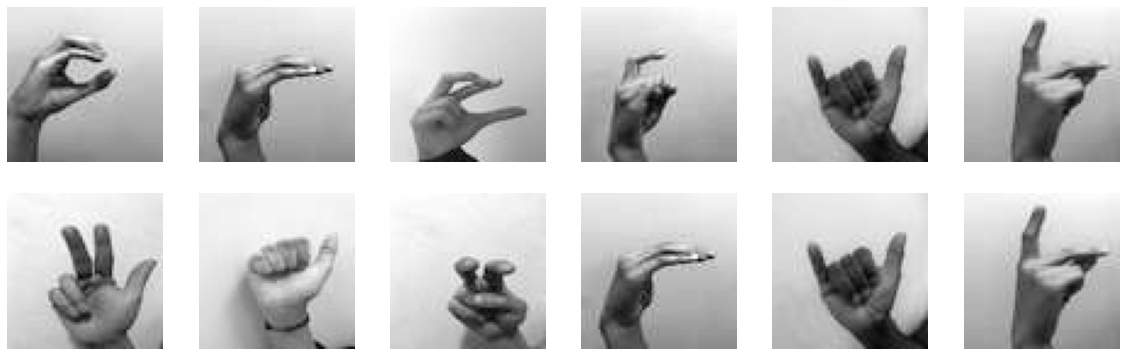

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),12))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i],cmap='gray')   
    plt.axis('off')

In [ ]:
X_pred_array = np.array(X_pred)

In [ ]:
y_result = sign_CNN_Model.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (32, 32)


ظ
ف
ح
ر
ط
ش
ه
ي
ص
ة
ظ
ض
خ
ف
ع
ذ
أ
ن
و
خ
ك
ش
ال
س
و
س
ط
ر
ط
د
ج
ه


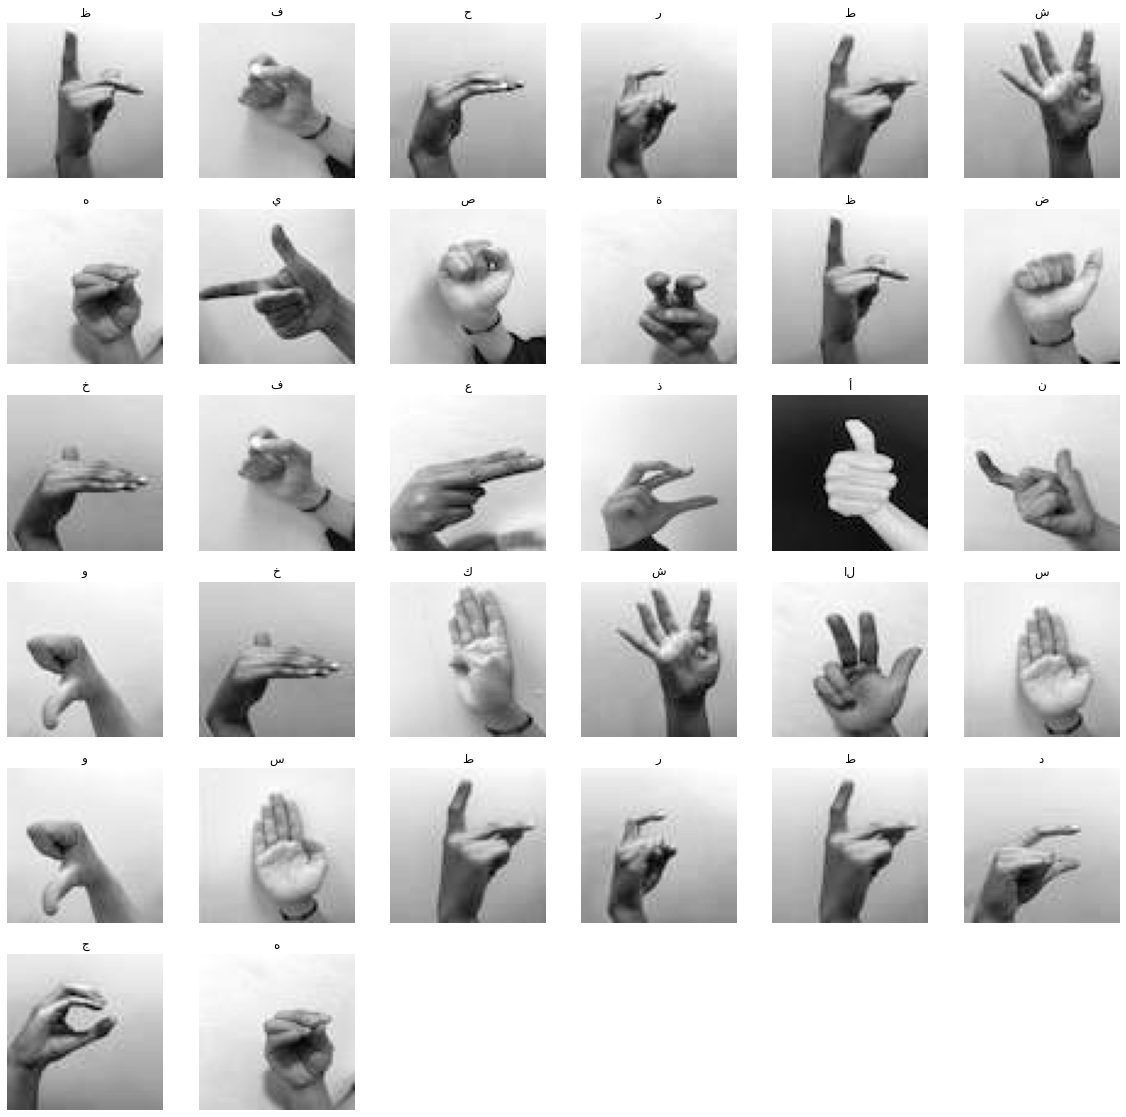

In [ ]:
test=[]
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),len(X_pred)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_result[i])))
    print(getsymbol(np.argmax(y_result[i])))
    test.append(getsymbol(np.argmax(y_result[i])))

In [ ]:
print(test)

['ظ', 'ف', 'ح', 'ر', 'ط', 'ش', 'ه', 'ي', 'ص', 'ة', 'ظ', 'ض', 'خ', 'ف', 'ع', 'ذ', 'أ', 'ن', 'و', 'خ', 'ك', 'ش', 'ال', 'س', 'و', 'س', 'ط', 'ر', 'ط', 'د', 'ج', 'ه']


# predict word ( " شمس " )

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ش1.zip'

pred_datash='ش1/'

X_predsh = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_datash)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_datash,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_predsh.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_predsh))

X_predsh = np.array(X_predsh).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_predsh.shape}')

X_predsh_array = np.array(X_predsh)

y_resultsh = sign_CNN_Model.predict(X_predsh_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ش1.zip
   creating: ش1/
  inflating: ش1/1SHEEN (1507).jpg   


100%|██████████| 1/1 [00:00<00:00, 1910.84it/s]

1
X shape  is (1, 64, 64)


Prediction Shape is (1, 32)


ش


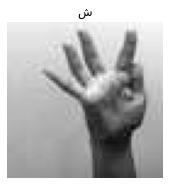

In [ ]:
testsh=[]
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_predsh),len(X_predsh)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_predsh[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    testsh.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/م2.zip'

pred_datash='م2/'

X_predsh = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_datash)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_datash,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_predsh.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_predsh))

X_predsh = np.array(X_predsh).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_predsh.shape}')

X_predsh_array = np.array(X_predsh)

y_resultsh = sign_CNN_Model.predict(X_predsh_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/م2.zip
   creating: م2/
  inflating: م2/2MEEM (1765).jpg    


100%|██████████| 1/1 [00:00<00:00, 2498.10it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


م


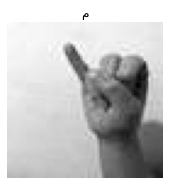

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_predsh),len(X_predsh)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_predsh[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    testsh.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/3س.zip'

pred_datash='3س/'

X_predsh = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_datash)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_datash,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_predsh.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_predsh))

X_predsh = np.array(X_predsh).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_predsh.shape}')

X_predsh_array = np.array(X_predsh)

y_resultsh = sign_CNN_Model.predict(X_predsh_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/3س.zip
   creating: 3س/
  inflating: 3س/3SEEN (1638).jpg    


100%|██████████| 1/1 [00:00<00:00, 795.28it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


س


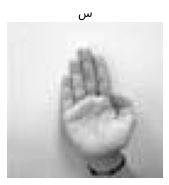

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_predsh),len(X_predsh)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_predsh[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    testsh.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
def listToString(s): 
    
    str1 = " " 
    
    return (str1.join(s))


t=(listToString(testsh)).replace(" ", "")
print(t)


شمس


In [ ]:
!git clone https://github.com/ARBML/klaam
%cd klaam

Cloning into 'klaam'...
remote: Enumerating objects: 523, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 523 (delta 42), reused 48 (delta 21), pack-reused 447
Receiving objects: 100% (523/523), 134.54 MiB | 26.87 MiB/s, done.
Resolving deltas: 100% (232/232), done.
Checking out files: 100% (152/152), done.
/content/klaam


In [ ]:
%%capture
!pip install -r requirements.txt

In [ ]:
from klaam import TextToSpeech
from IPython.display import Audio

modelsh = TextToSpeech()
modelsh.synthesize(t)
Audio("sample.wav")

Downloading...
From: https://drive.google.com/uc?id=1J7ZP_q-6mryXUhZ-8j9-RIItz2nJGOIX
To: /content/klaam/model.pth.tar
100%|██████████| 418M/418M [00:07<00:00, 55.6MB/s]


Removing weight norm...
skipped
['$', 'm', 's']
Raw Text Sequence: شمس
Phoneme Sequence: {$ m s sil}


# predict word ( " قمر " )

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ق1.zip'

pred_datash='ق1/'
X_predsh = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_datash)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_datash,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_predsh.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_predsh))

X_predsh = np.array(X_predsh).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_predsh.shape}')

X_predsh_array = np.array(X_predsh)

y_resultsh = sign_CNN_Model.predict(X_predsh_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ق1.zip
   creating: ق1/
  inflating: ق1/GAAF (1705).jpg     


100%|██████████| 1/1 [00:00<00:00, 1693.98it/s]

1
X shape  is (1, 64, 64)


Prediction Shape is (1, 32)


ق


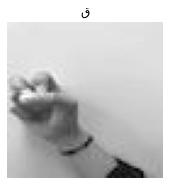

In [ ]:
testmoon=[]
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_predsh),len(X_predsh)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_predsh[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    testmoon.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/م2.zip'

pred_datash='م2/'
X_predsh = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_datash)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_datash,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_predsh.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_predsh))

X_predsh = np.array(X_predsh).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_predsh.shape}')

X_predsh_array = np.array(X_predsh)

y_resultsh = sign_CNN_Model.predict(X_predsh_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/م2.zip
   creating: م2/
  inflating: م2/2MEEM (1765).jpg    


100%|██████████| 1/1 [00:00<00:00, 1248.68it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


م


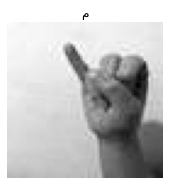

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_predsh),len(X_predsh)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_predsh[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    testmoon.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ر3.zip'

pred_datash='ر3/'

X_predsh = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_datash)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_datash,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_predsh.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_predsh))

X_predsh = np.array(X_predsh).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_predsh.shape}')

X_predsh_array = np.array(X_predsh)

y_resultsh = sign_CNN_Model.predict(X_predsh_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ر3.zip
   creating: ر3/
  inflating: ر3/16RA (1659).jpg     


100%|██████████| 1/1 [00:00<00:00, 1781.78it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ر


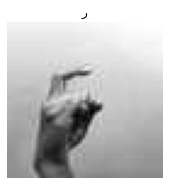

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_predsh),len(X_predsh)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_predsh[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    testmoon.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:

t2=(listToString(testmoon)).replace(" ", "")
print(t2)

قمر


In [ ]:
modelamr = TextToSpeech()
modelamr.synthesize(t2)
Audio("sample.wav")

Removing weight norm...
skipped
['q', 'm', 'r']
Raw Text Sequence: قمر
Phoneme Sequence: {q m r sil}


# predict word ( " يلعب " )

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ى.zip'

pred_datash='ى/'
X_predsh = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_datash)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_datash,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_predsh.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_predsh))

X_predsh = np.array(X_predsh).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_predsh.shape}')

X_predsh_array = np.array(X_predsh)

y_resultsh = sign_CNN_Model.predict(X_predsh_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ى.zip
   creating: ى/
  inflating: ى/1YAA (1293).jpg      


100%|██████████| 1/1 [00:00<00:00, 384.98it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


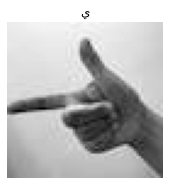

In [ ]:
testplay=[]
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_predsh),len(X_predsh)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_predsh[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    testplay.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ل.zip'

pred_datash='ل/'
X_predsh = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_datash)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_datash,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_predsh.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_predsh))

X_predsh = np.array(X_predsh).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_predsh.shape}')

X_predsh_array = np.array(X_predsh)

y_resultsh = sign_CNN_Model.predict(X_predsh_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ل.zip
   creating: ل/
  inflating: ل/2LAAM (1832).jpg     


100%|██████████| 1/1 [00:00<00:00, 1322.29it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


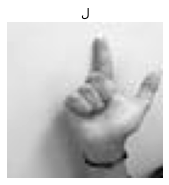

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_predsh),len(X_predsh)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_predsh[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    testplay.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ع.zip'

pred_datash='ع/'
X_predsh = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_datash)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_datash,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_predsh.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_predsh))

X_predsh = np.array(X_predsh).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_predsh.shape}')

X_predsh_array = np.array(X_predsh)

y_resultsh = sign_CNN_Model.predict(X_predsh_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ع.zip
   creating: ع/
  inflating: ع/3AIN (2114).jpg      


100%|██████████| 1/1 [00:00<00:00, 2015.52it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


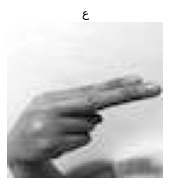

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_predsh),len(X_predsh)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_predsh[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    testplay.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ب.zip'

pred_datash='ب/'
X_predsh = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_datash)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_datash,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_predsh.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_predsh))

X_predsh = np.array(X_predsh).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_predsh.shape}')

X_predsh_array = np.array(X_predsh)

y_resultsh = sign_CNN_Model.predict(X_predsh_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ب.zip
   creating: ب/
  inflating: ب/4BB (1791).jpg       


100%|██████████| 1/1 [00:00<00:00, 660.52it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


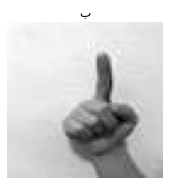

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_predsh),len(X_predsh)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_predsh[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    testplay.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
t3=(listToString(testplay)).replace(" ", "")
print(t3)

يلعب


In [ ]:
modelplay = TextToSpeech()
modelplay.synthesize(t3)
Audio("sample.wav")

Removing weight norm...
skipped
['ii0', 'l', 'E', 'b']
Raw Text Sequence: يلعب
Phoneme Sequence: {ii0 l E b sil}


#  Predict word ( " بسم الله الرحمن الرحيم " )

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ب.zip'

pred_data_Basmallah='ب/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ب.zip
replace ب/4BB (1791).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: غ
error:  invalid response [غ]
replace ب/4BB (1791).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ب/4BB (1791).jpg       


100%|██████████| 1/1 [00:00<00:00, 1538.07it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ب


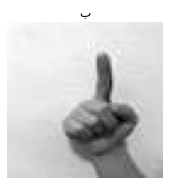

In [ ]:
test_Basmallah=[]
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/3س.zip'

pred_data_Basmallah='3س/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/3س.zip
   creating: 3س/
  inflating: 3س/3SEEN (1638).jpg    


100%|██████████| 1/1 [00:00<00:00, 1133.60it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


س


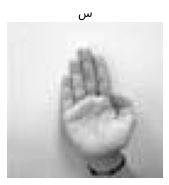

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/م2.zip'

pred_data_Basmallah='م2/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/م2.zip
replace م2/2MEEM (1765).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: م2/2MEEM (1765).jpg    


100%|██████████| 1/1 [00:00<00:00, 1697.41it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


م


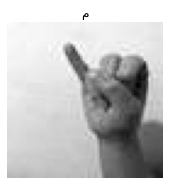

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ا.zip'

pred_data_Basmallah='ا/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ا.zip
   creating: ا/
  inflating: ا/Aleff (1672).JPG     


100%|██████████| 1/1 [00:00<00:00, 1632.66it/s]

1
X shape  is (1, 64, 64)


Prediction Shape is (1, 32)


أ


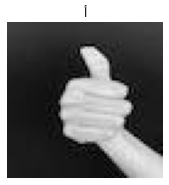

In [ ]:
test_Basmallah2=[]
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah2.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ل.zip'

pred_data_Basmallah='ل/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ل.zip
replace ل/2LAAM (1832).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ل/2LAAM (1832).jpg     


100%|██████████| 1/1 [00:00<00:00, 977.47it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ل


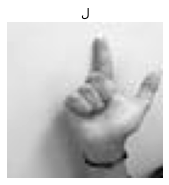

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah2.append(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah2.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ه.zip'

pred_data_Basmallah='ه/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ه.zip
   creating: ه/
  inflating: ه/HA (1592).jpg        


100%|██████████| 1/1 [00:00<00:00, 2225.09it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ه


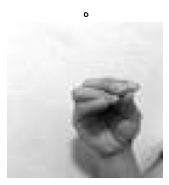

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah2.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ا.zip'

pred_data_Basmallah='ا/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ا.zip
replace ا/Aleff (1672).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ا/Aleff (1672).JPG     


100%|██████████| 1/1 [00:00<00:00, 1542.02it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


أ


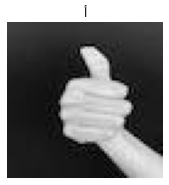

In [ ]:
test_Basmallah3=[]
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah3.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ل.zip'

pred_data_Basmallah='ل/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ل.zip
replace ل/2LAAM (1832).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ل/2LAAM (1832).jpg     


100%|██████████| 1/1 [00:00<00:00, 1984.06it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ل


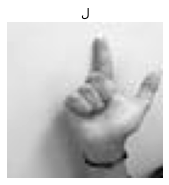

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah3.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ر3.zip'

pred_data_Basmallah='ر3/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ر3.zip
replace ر3/16RA (1659).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ر3/16RA (1659).jpg     


100%|██████████| 1/1 [00:00<00:00, 1368.90it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ر


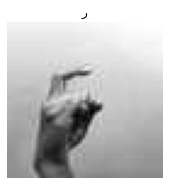

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah3.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ح.zip'

pred_data_Basmallah='ح/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ح.zip
   creating: ح/
  inflating: ح/HAA (1526).jpg       


100%|██████████| 1/1 [00:00<00:00, 1895.30it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ح


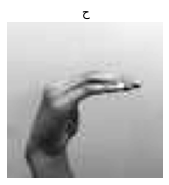

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah3.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/م2.zip'

pred_data_Basmallah='م2/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/م2.zip
replace م2/2MEEM (1765).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: م2/2MEEM (1765).jpg    


100%|██████████| 1/1 [00:00<00:00, 1925.76it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


م


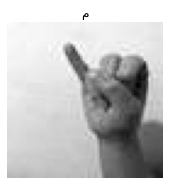

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah3.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ن.zip'

pred_data_Basmallah='ن/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ن.zip
   creating: ن/
  inflating: ن/Nun (1819).jpg       


100%|██████████| 1/1 [00:00<00:00, 2029.17it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ن


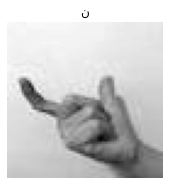

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah3.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ا.zip'

pred_data_Basmallah='ا/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ا.zip
replace ا/Aleff (1672).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ا/Aleff (1672).JPG     


100%|██████████| 1/1 [00:00<00:00, 1017.54it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


أ


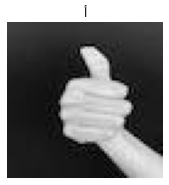

In [ ]:
test_Basmallah4=[]
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah4.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ل.zip'

pred_data_Basmallah='ل/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ل.zip
replace ل/2LAAM (1832).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ل/2LAAM (1832).jpg     


100%|██████████| 1/1 [00:00<00:00, 2277.04it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ل


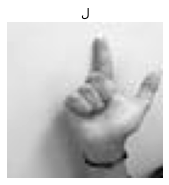

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah4.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ر3.zip'

pred_data_Basmallah='ر3/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ر3.zip
replace ر3/16RA (1659).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ر3/16RA (1659).jpg     


100%|██████████| 1/1 [00:00<00:00, 351.72it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ر


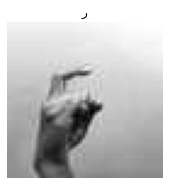

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah4.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ح.zip'

pred_data_Basmallah='ح/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ح.zip
replace ح/HAA (1526).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ح/HAA (1526).jpg       


100%|██████████| 1/1 [00:00<00:00, 2313.46it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ح


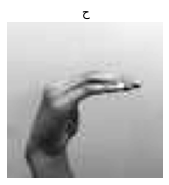

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah4.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ى.zip'

pred_data_Basmallah='ى/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ى.zip
replace ى/1YAA (1293).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ى/1YAA (1293).jpg      


100%|██████████| 1/1 [00:00<00:00, 864.98it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ي


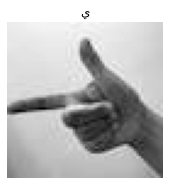

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah4.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/م2.zip'

pred_data_Basmallah='م2/'

X_pred_Basmallah = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_Basmallah)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_Basmallah,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_Basmallah.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_Basmallah))

X_pred_Basmallah = np.array(X_pred_Basmallah).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_Basmallah.shape}')

X_pred_Basmallah_array = np.array(X_pred_Basmallah)

y_resultsh = sign_CNN_Model.predict(X_pred_Basmallah_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/م2.zip
replace م2/2MEEM (1765).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: م2/2MEEM (1765).jpg    


100%|██████████| 1/1 [00:00<00:00, 1740.38it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


م


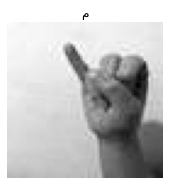

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_Basmallah),len(X_pred_Basmallah)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_Basmallah[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_Basmallah4.append(getsymbol(np.argmax(y_resultsh[i])))

# Text ( بسم الله الرحمن الرحيم )

In [ ]:
s=" "
test_Basmallah=(listToString(test_Basmallah)).replace(" ", "")
test_Basmallah2=(listToString(test_Basmallah2)).replace(" ", "")
test_Basmallah3=(listToString(test_Basmallah3)).replace(" ", "")
test_Basmallah4=(listToString(test_Basmallah4)).replace(" ", "")


text_Basmallah=test_Basmallah+s+test_Basmallah2+s+test_Basmallah3+s+test_Basmallah4


print(text_Basmallah)



بسم ألله ألرحمن ألرحيم


# Speech ( بسم الله الرحمن الرحيم)



In [ ]:
modelamr = TextToSpeech()
modelamr.synthesize(text_Basmallah)
Audio("sample.wav")

Removing weight norm...
skipped
['b', 's', 'm']
skipped
['<', 'a', 'l', 'l', 'h']
skipped
['<', 'a', 'l', 'r', 'H', 'm', 'n']
Raw Text Sequence: بسم ألله ألرحمن ألرحيم
Phoneme Sequence: {b s m < a l l h < a l r H m n < a l r H ii0 m sil}


#  Predict word ("انا اريد عصير" )

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ا.zip'

pred_data_3aser='ا/'

X_pred_3aser = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_3aser)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_3aser,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_3aser.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_3aser))

X_pred_3aser = np.array(X_pred_3aser).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_3aser.shape}')

X_pred_3aser_array = np.array(X_pred_3aser)

y_resultsh = sign_CNN_Model.predict(X_pred_3aser_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ا.zip
replace ا/Aleff (1672).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ا/Aleff (1672).JPG     


100%|██████████| 1/1 [00:00<00:00, 1792.44it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


أ


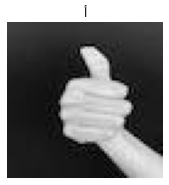

In [ ]:
test_3aser1=[]
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_3aser),len(X_pred_3aser)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_3aser[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_3aser1.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ن.zip'

pred_data_3aser='ن/'

X_pred_3aser = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_3aser)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_3aser,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_3aser.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_3aser))

X_pred_3aser = np.array(X_pred_3aser).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_3aser.shape}')

X_pred_3aser_array = np.array(X_pred_3aser)

y_resultsh = sign_CNN_Model.predict(X_pred_3aser_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ن.zip
replace ن/Nun (1819).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ن/Nun (1819).jpg       


100%|██████████| 1/1 [00:00<00:00, 2182.26it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ن


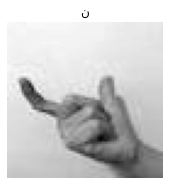

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_3aser),len(X_pred_3aser)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_3aser[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_3aser1.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ا.zip'

pred_data_3aser='ا/'

X_pred_3aser = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_3aser)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_3aser,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_3aser.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_3aser))

X_pred_3aser = np.array(X_pred_3aser).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_3aser.shape}')

X_pred_3aser_array = np.array(X_pred_3aser)

y_resultsh = sign_CNN_Model.predict(X_pred_3aser_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ا.zip
replace ا/Aleff (1672).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ا/Aleff (1672).JPG     


100%|██████████| 1/1 [00:00<00:00, 1971.93it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


أ


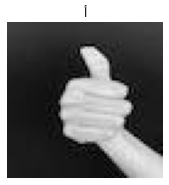

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_3aser),len(X_pred_3aser)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_3aser[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_3aser1.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ا.zip'

pred_data_3aser='ا/'

X_pred_3aser = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_3aser)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_3aser,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_3aser.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_3aser))

X_pred_3aser = np.array(X_pred_3aser).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_3aser.shape}')

X_pred_3aser_array = np.array(X_pred_3aser)

y_resultsh = sign_CNN_Model.predict(X_pred_3aser_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ا.zip
replace ا/Aleff (1672).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ا/Aleff (1672).JPG     


100%|██████████| 1/1 [00:00<00:00, 2033.11it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


أ


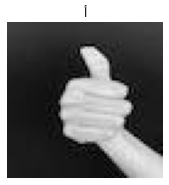

In [ ]:
test_3aser2=[]
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_3aser),len(X_pred_3aser)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_3aser[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_3aser2.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ر3.zip'

pred_data_3aser='ر3/'

X_pred_3aser = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_3aser)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_3aser,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_3aser.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_3aser))

X_pred_3aser = np.array(X_pred_3aser).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_3aser.shape}')

X_pred_3aser_array = np.array(X_pred_3aser)

y_resultsh = sign_CNN_Model.predict(X_pred_3aser_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ر3.zip
replace ر3/16RA (1659).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ر3/16RA (1659).jpg     


100%|██████████| 1/1 [00:00<00:00, 1072.99it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ر


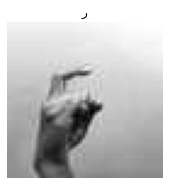

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_3aser),len(X_pred_3aser)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_3aser[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_3aser2.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ى.zip'

pred_data_3aser='ى/'

X_pred_3aser = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_3aser)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_3aser,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_3aser.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_3aser))

X_pred_3aser = np.array(X_pred_3aser).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_3aser.shape}')

X_pred_3aser_array = np.array(X_pred_3aser)

y_resultsh = sign_CNN_Model.predict(X_pred_3aser_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ى.zip
replace ى/1YAA (1293).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ى/1YAA (1293).jpg      


100%|██████████| 1/1 [00:00<00:00, 1898.73it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ي


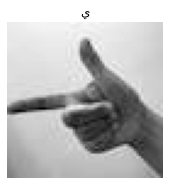

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_3aser),len(X_pred_3aser)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_3aser[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_3aser2.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/د.zip'

pred_data_3aser='د/'

X_pred_3aser = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_3aser)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_3aser,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_3aser.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_3aser))

X_pred_3aser = np.array(X_pred_3aser).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_3aser.shape}')

X_pred_3aser_array = np.array(X_pred_3aser)

y_resultsh = sign_CNN_Model.predict(X_pred_3aser_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/د.zip
   creating: د/
  inflating: د/DAL (1634).jpg       


100%|██████████| 1/1 [00:00<00:00, 523.83it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


د


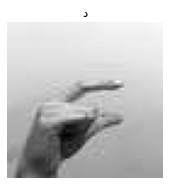

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_3aser),len(X_pred_3aser)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_3aser[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_3aser2.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ع.zip'

pred_data_3aser='ع/'

X_pred_3aser = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_3aser)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_3aser,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_3aser.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_3aser))

X_pred_3aser = np.array(X_pred_3aser).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_3aser.shape}')

X_pred_3aser_array = np.array(X_pred_3aser)

y_resultsh = sign_CNN_Model.predict(X_pred_3aser_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ع.zip
replace ع/3AIN (2114).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: u
error:  invalid response [u]
replace ع/3AIN (2114).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ع
error:  invalid response [ع]
replace ع/3AIN (2114).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ع/3AIN (2114).jpg      


100%|██████████| 1/1 [00:00<00:00, 1218.92it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ع


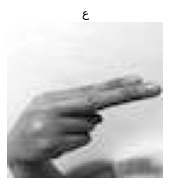

In [ ]:
test_3aser3=[]
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_3aser),len(X_pred_3aser)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_3aser[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_3aser3.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ص.zip'

pred_data_3aser='ص/'

X_pred_3aser = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_3aser)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_3aser,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_3aser.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_3aser))

X_pred_3aser = np.array(X_pred_3aser).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_3aser.shape}')

X_pred_3aser_array = np.array(X_pred_3aser)

y_resultsh = sign_CNN_Model.predict(X_pred_3aser_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ص.zip
   creating: ص/
  inflating: ص/SAAD (1895).jpg      


100%|██████████| 1/1 [00:00<00:00, 228.49it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ص


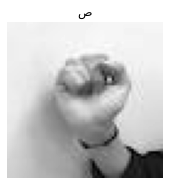

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_3aser),len(X_pred_3aser)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_3aser[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_3aser3.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ى.zip'

pred_data_3aser='ى/'

X_pred_3aser = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_3aser)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_3aser,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_3aser.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_3aser))

X_pred_3aser = np.array(X_pred_3aser).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_3aser.shape}')

X_pred_3aser_array = np.array(X_pred_3aser)

y_resultsh = sign_CNN_Model.predict(X_pred_3aser_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ى.zip
replace ى/1YAA (1293).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ى/1YAA (1293).jpg      


100%|██████████| 1/1 [00:00<00:00, 2228.64it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ي


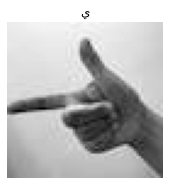

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_3aser),len(X_pred_3aser)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_3aser[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_3aser3.append(getsymbol(np.argmax(y_resultsh[i])))

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/ر3.zip'

pred_data_3aser='ر3/'

X_pred_3aser = []

IMG_SIZE=64
def sh_data():
    for imgsh in tqdm(os.listdir(pred_data_3aser)):  # iterate over each image 
        try:
            img_arraysh = cv2.imread(os.path.join(pred_data_3aser,imgsh) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_arraysh = cv2.resize(img_arraysh, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            X_pred_3aser.append([new_arraysh])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
           

sh_data()

print(len(X_pred_3aser))

X_pred_3aser = np.array(X_pred_3aser).reshape(-1, IMG_SIZE, IMG_SIZE)
print(f'X shape  is {X_pred_3aser.shape}')

X_pred_3aser_array = np.array(X_pred_3aser)

y_resultsh = sign_CNN_Model.predict(X_pred_3aser_array)

print('Prediction Shape is {}'.format(y_resultsh.shape))

Archive:  /content/drive/MyDrive/Colab Notebooks/ر3.zip
replace ر3/16RA (1659).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ر3/16RA (1659).jpg     


100%|██████████| 1/1 [00:00<00:00, 426.21it/s]

1
X shape  is (1, 64, 64)
Prediction Shape is (1, 32)


ر


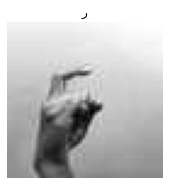

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred_3aser),len(X_pred_3aser)))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred_3aser[i],cmap='gray')    
    plt.axis('off')
    plt.title(getsymbol(np.argmax(y_resultsh[i])))
    print(getsymbol(np.argmax(y_resultsh[i])))
    test_3aser3.append(getsymbol(np.argmax(y_resultsh[i])))

# Text ( انا اريد عصير )

In [ ]:
test_3aser2

s=" "
test_3aser1=(listToString(test_3aser1)).replace(" ", "")
test_3aser2=(listToString(test_3aser2)).replace(" ", "")
test_3aser3=(listToString(test_3aser3)).replace(" ", "")


text_3aser=test_3aser1+s+test_3aser2+s+test_3aser3


print(text_3aser)



أنأ أريد عصير


# Speech ( انا اريد عصير )

In [ ]:
model3aser = TextToSpeech()
model3aser.synthesize(text_3aser3)
Audio("sample.wav")

Removing weight norm...
Raw Text Sequence: أنأ أريد عصير
Phoneme Sequence: {< a n < < a r ii0 d E S ii0 r sil}
